 <font size="6">Генерация и отбор признаков</font>


# Генерация признаков



>Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine" learning is basically feature engineering. @Andrew Ng

Общая схема классического машинного обучения выглядит так. Даже в случае нейросетей некая предобработка исходных данных все равно не бывает лишней.

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/data_preparation.png" width="600">



> Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. @Dr. Jason Brownlee

**Генерация признаков** &mdash; процесс придумывания способов описания данных с помощью простых значений, которые должны отражать характеристики объектов исследований, через которые выражаются целевые значения.






Изначально объекты в нашем датасете могут быть представлены в виде описаний, которые не являются признаковыми или требуют некоторой предобработки. Например:
*   веб-страницы;
*   файлы;
*   ссылки на участников группы;
*   измерения в разных единицах (см, м, дм) и т.д.

Большая часть моделей не способна работать с такими представлениями в сыром виде и просто не запустится или будет выдавать неадекватные результаты.

Процесс создания признаков зависит от модели, которую мы собираемся использовать. Для одних моделей полезно добавить признаки, полученные делением/перемножением исходных. Другие модели могут провести эти операции сами, причем, экономнее/менее переобучаясь. Как вариант, добавление признаков, явно зависящих друг от друга, может даже мешать некоторым моделям.

Например, плохая идея добавлять в обычную линейную модель как признаки X1 и X2, так и их сумму.

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/process_of_generation_features.png" width="700">

Вообще говоря, надо понимать, что процесс feature engineering является критическим местом, bottleneck, в машинном обучении. Все, что ваша модель будет знать о данных, решается на этом этапе. Больше, чем вы ей дадите, она не узнает.

Если вы в данных дадите явную подсказку об ответе, то она будет использовать эту подсказку, а реальные закономерности может и не выучить. К примеру, можно дать ей в качестве признака id покупателя, который каждую неделю покупает одно и то же. Если таких ситуаций будет много, то она и выучит, что надо предсказывать все по id. Когда же к вам придет новый покупатель или у старого что-то поменяется в поведении, модель начнет вести себя неадекватно.

Точно такую же роль может сыграть информация о номере эксперимента, лаборатории, в которой его проводили, аспиранте, который его проводил и т.д.

Такая ситуация называется **data leakage**.

Таким образом, если вы дадите модели только нерелевантную информацию, то она ничего из нее не вытащит.

> At the end of the day, some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used. @ Prof. Pedro Domingos

> The algorithms we used are very standard for Kagglers. …We spent most of our efforts in feature engineering. … We were also very careful to discard features likely to expose us to the risk of over-fitting our model.  @Xavier Conort, топ-участник Kaggle

**Пример на Titanic**

Для иллюстрации будут использованы примеры из книги "[Real-World Machine Learning](https://www.manning.com/books/real-world-machine-learning)" из открытого [репозитория](https://github.com/brinkar/real-world-machine-learning) и датасет [Titanic](https://www.kaggle.com/datasets/brendan45774/test-file
).

Данный датасет представляет собой список пассажиров судна. Данные в нем не предобработаны, и в сыром виде не могут быть использованы для обучения модели.

In [ ]:
import pandas as pd

# Download the data and save it in a variable called data
dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/titanic.csv"
)  # Load the data using pandas
dataset[:5]  # Show the first 5 lines

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

*  SibSp  == Number of Siblings/Spouses Aboard — количество братьев/сестер/супругов на борту Титаника.
*  Parch == Number of Parents/Children Aboard — количество родителей/детей на борту.
*  Embarked == Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) — порт посадки.

Если мы попытаемся обучить модель на таких данных, то у нас ничего не выйдет.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

x = dataset.drop("Survived", axis=1)  # drop target
y = dataset["Survived"]  # target

rf = RandomForestClassifier(random_state=42)

try:
    rf.fit(x, y)
except ValueError as e:
    print(e)

could not convert string to float: 'Braund, Mr. Owen Harris'


Посмотрим на информацию о признаках:

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Типы признаков

Традиционно признаки делятся на:

### Вещественные

Вещественные признаки бывают:

 * дискретные. Например, число лайков от пользователей


<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/discrete_features_social_media_likes.jpg" width="1000">

В датасете Титаник таким параметром будет SibSp — количество братьев/сестер/супругов на борту.

In [ ]:
print(dataset.SibSp[:5])

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64


Или Parch — количество родителей/детей на борту.

In [ ]:
print(dataset["Parch"].unique())

[0 1 2 5 3 4 6]


 * непрерывные. Например, температура

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/continuous_features_thermometer.png" width="600">

Понятно, что разделение часто условное. Тот же возраст можно посчитать и дискретной переменной (пользователь всегда нам сообщает свои полные года), и непрерывной (возраст можно считать с любой точностью, но никто не будет) )

Также иногда вещественные признаки делят на относительные (считаются относительно чего-то, уже нормированные и т.д.)  и интервальные.

In [ ]:
dataset[["Age", "Fare"]].head()

Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

Попробуем обучить модель чисто на вещественных признаках. PassengerId удалим, т.к. этот признак может приводить к утечке в данных.

In [ ]:
from sklearn.model_selection import train_test_split

x = dataset.drop(columns=["Survived", "PassengerId"])  # drop target and id
y = dataset["Survived"]  # target

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
# drop categorical
x_train_working = x_train.drop(
    columns=["Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
)
x_test_working = x_test.drop(
    columns=["Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
)

rf = RandomForestClassifier(random_state=42)

try:
    rf.fit(x_train_working, y_train)
except ValueError as e:
    print(e)

x_train_working.head()

Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


Age  SibSp  Parch     Fare
331  45.5      0      0  28.5000
733  23.0      0      0  13.0000
382  32.0      0      0   7.9250
704  26.0      1      0   7.8542
813   6.0      4      2  31.2750

Проблема, что Age указан только для 714 пассажиров из 891. Его мы пока тоже удалим.

In [ ]:
from sklearn.metrics import accuracy_score

x_train_working = x_train_working.drop(columns=["Age"])
x_test_working = x_test_working.drop(columns=["Age"])

rf = RandomForestClassifier(random_state=42)

rf.fit(x_train_working, y_train)
y_pred = rf.predict(x_test_working)

print(accuracy_score(y_test, y_pred))

0.6759776536312849


Точность предсказания 67.6%. Для улучшения качества попробуем добавить другие признаки.

### Категориальные

Значение —  принадлежность к какой-то из категорий. Традиционно делятся на сильно отличающиеся по свойствам:
 * упорядоченные (ординальные) — для каждой пары возможных категорий можем сказать, какая больше, а какая меньше. Например, класс места или размер одежды.

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/categorical_ordered_features.png" width="600">

В датасете Титаник таким признаком будет класс. Мы можем сказать, что первый класс лучше третьего, но не можем  сказать, что сумма первого и второго даст третий.

In [ ]:
print(dataset["Pclass"].unique())

[3 1 2]


 * неупорядоченные (номинальные) &mdash; категории между собой несравнимы. Обычно нельзя сказать, что красный телефон больше синего или что солнечная погода больше снежной.


<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/categorical_unordered_features.png" width="900">

В датасете Титаник таким признаком является Embarked (порт посадки).

In [ ]:
print(dataset["Embarked"].unique())
# C = Cherbourg; Q = Queenstown; S = Southampton

['S' 'C' 'Q' nan]


Часто мы сталкиваемся с бинарными категориальными признаками, для которых известно только две возможных категории (например, биологический пол человека).

In [ ]:
print(dataset["Sex"].unique())

['male' 'female']


## Преобразования признаков



Результат работы модели будет зависеть от ее признакового описания. Преобразование и генерация признаков &mdash; отдельный “вид искусства”, включающий:

* визуализацию данных (поиск зависимостей в данных, анализ распределений, поиск выбросов);
* экспертный анализ (понимание природы данных, диапазонов значений, примерных распределений и т.д.);
* анализ “проблемных” объектов (посмотреть, на каких данных модель ошибается, попробовать понять почему).

Для того, чтобы понять, что новое признаковое описание лучше, нужно обучить модель.

Процесс подготовки признаков будет также зависеть от модели, которую мы используем. Например, one-hot encoding плохо работает со случайным лесом (подробности ниже).

### Категориальных признаков

#### Label encoding

В Label encoding каждой категории признака однозначно сопоставляется число. Данный подход хорошо работает для упорядоченных (ординальных) признаков.

Если признак неупорядоченный (номинальный), то могут возникнуть проблемы.
Например, если мы обозначим:
$$Уж = 1$$
$$Ёж = 2$$
$$Белка = 3$$
Получится, что
$$Уж+Ёж = Белка$$
что не является свойством данных.
Кроме того, мы не можем сказать, что уж “больше” ежа и сравнить его с белкой, но обучаемая модель про это не знает и будет пытаться их сравнить. Это может привести к низкому качеству модели и выучиванию неправильной информации. Например, дерево решений для выделения одной категории должно будет проделать несколько сравнений, что может не произойти в силу жадности алгоритма.

Некоторые модели (например, [LightGBM](https://lightgbm.readthedocs.io/en/latest/)) могут автоматически подбирать кодировку для категориальных признаков, если предоставить им информацию, что признак категориальный, для других моделей это нужно делать вручную.

У нас есть упорядоченный категориальный признак — класс, которым ехал пассажир. Добавим его к данным.

In [ ]:
x_train_working["Pclass"] = x_train["Pclass"]
x_test_working["Pclass"] = x_test["Pclass"]

x_train_working[:5]

SibSp  Parch     Fare  Pclass
331      0      0  28.5000       1
733      0      0  13.0000       2
382      0      0   7.9250       3
704      1      0   7.8542       3
813      4      2  31.2750       3

#### One-hot encoding

На практике часто используется one-hot encoding. Вместо одного категориального признака $X$ создается набор бинарных категориальных признаков, которые отвечают на вопрос $X == C$, где $C$ перебирает все возможные значения категориального признака.

Теперь, чтобы выбрать конкретное значение категориального признака, дереву решений достаточно задать один вопрос.

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/one_hot_encoding.png" width="450">

У такой схемы есть ряд недостатков:

1. Мы получаем линейно зависимые признаки. Это может плохо влиять на некоторые модели. Например, в линейных моделях линейная зависимость признаков приводит к тому, что решение оптимизационной задачи (результат подбора весов) может быть не уникальным и сколь угодно большим по модулю, что негативно сказывается на работе модели. Подробнее об этом можно почитать по [ссылке](https://inmachineswetrust.com/posts/drop-first-columns/).

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/problem_of_ohe.png" width="850">

Поэтому одну из категорий могут исключить при кодировании. Например, в примере выше можно исключить **Рыбу**, ведь если все три других признака-категории равны 0, то точно верно, что категория — **Рыба**.

2. При использовании one-hot encoding один категориальный признак может преобразовываться в десятки бинарных признаков. При использовании случайного леса выбирается случайное подмножество признаков. Преобразованные во множество бинарных, категориальные признаки будут встречаться чаще, чем вещественные, что может привести к тому, что значимость категориальных признаков будет завышена.

У нас есть два признака с ограниченным количеством значений: Sex и Embarked.

Пол закодируем male = 1 female = 0.

In [ ]:
sex = {"male": 1, "female": 0}

x_train_working["Sex"] = x_train["Sex"].map(sex)
x_test_working["Sex"] = x_test["Sex"].map(sex)

x_train_working[:5]

SibSp  Parch     Fare  Pclass  Sex
331      0      0  28.5000       1    1
733      0      0  13.0000       2    1
382      0      0   7.9250       3    1
704      1      0   7.8542       3    1
813      4      2  31.2750       3    0

#### Count encoding

Еще один способ, который показал свою эффективность — это кодирование категориальной переменной по количеству встречаемости в данных.


|  category | new_feature |
|:---------:|:-----------:|
|    food   |      3     |
| equipment |      2     |
|    food   |      3     |
|  food     |      3     |
| equipment |      2     |
|  clothes  |      1     |

Его просто и быстро реализовать. Здесь также присутствует логика порядка, который возникает естественным образом. Чем больше число, тем чаще встречается категория. Также здесь отсутствует ложная линейная зависимость, в нашем случае `equipment + clothes = food` и для нас это действительно так, потому что наше кодирование отражает связь между категориями через их частоту.

Дополнительно стоит добавить шум к данным, чтобы избежать ситуации, когда разные категории кодируются одинаковым числом.

|  category | new_feature |
|:---------:|:-----------:|
|    food   |      2.3     |
| equipment |      2.04  |
|    food   |      2.3     |
|  clothes  |      2.6     |
| equipment |      2.04     |
|  clothes  |      2.6     |

#### Кодирование по вещественному признаку

Можем кодировать категориальный признак по какой-то статистике вещественного.
Например, при прогнозировании покупок в интернет магазине может оказаться разумным кодировать категории товаров их средней ценой.

|  category |  product | price | new_feature |
|:---------:|:--------:|:-----:|:-----------:|
|    food   |   pizza  |   30  |      17     |
| equipment |  hammer  |  140  |     170     |
|    food   | cucumber |   4   |      17     |
|  clothes  |   boots  |  100  |      60     |
| equipment |  helmet  |  200  |     170     |
|  clothes  |  gloves  |   20  |      60     |

#### Target encoding

В Target encoding каждая категория кодируется численным параметром, характеризующим то, что мы предсказываем. Например, можно каждую категорию категориального признака заменять на среднее целевого значения (mean target).

При этом может возникнуть проблема переобучения: для редких классов модель может научиться копировать значение mean target категориального признака в ответ, игнорируя другие признаки. Как с этим борются можно посмотреть [здесь](https://github.com/Dyakonov/PZAD/blob/master/2020/PZAD2020_042featureengineering_07.pdf).



Так как у нас в качестве модели используется случайный лес, для Embarked будем использовать Label encoding. Мы не будем считать среднее. Используем Target, чтобы упорядочить метки. Посмотрим, какой процент выживших для каждого порта. Смотреть будем только на train выборке. Подглядывать в test — не честно!!!

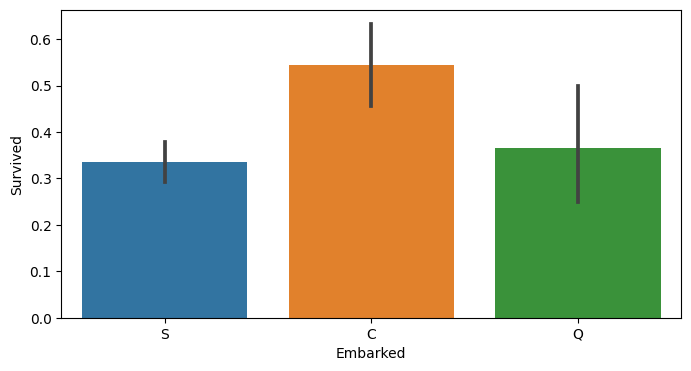

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 4))

train_df = x_train.copy()
train_df["Survived"] = y_train
sns.barplot(x="Embarked", y="Survived", data=train_df)
plt.show()

Получили количество выживших $S<Q<C$. Упорядочим метки соответственно.

In [ ]:
import numpy as np

emb = {np.nan: 0, "S": 0, "Q": 1, "C": 2}

x_train_working["Embarked"] = x_train["Embarked"].map(emb)
x_test_working["Embarked"] = x_test["Embarked"].map(emb)

x_train_working[5:10]

SibSp  Parch      Fare  Pclass  Sex  Embarked
118      0      1  247.5208       1    1         2
536      0      0   26.5500       1    1         0
361      1      0   27.7208       2    1         2
29       0      0    7.8958       3    1         0
55       0      0   35.5000       1    1         0

У нас осталось еще 4 признака, с которыми непонятно, что делать: Name, Ticket, Cabin, Age.

#### Embedding

Можно научить вашу модель саму сопоставлять каждой категории некий вектор определенной размерности. Для этого вначале сопоставляем каждой категории случайный вектор заданной длины. А далее изменяем этот вектор как обычные веса. Подробнее о формирование векторов-признаков (embedding) будет рассказано в других лекциях курса.

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/embedding.png" width="500">

Рассмотрим поле Name. Это поле может нести информацию о поле, социальном статусе, происхождении, национальности, возрасте и т.д. Можно построить модели, которые будут это оценивать и отражать. Мы будем работать с числовыми представлениями текста в нашем курсе. Но пока мы можем использовать метод "пристального вглядывания" в данные.

In [ ]:
x_train.Name[:5]

331                   Partner, Mr. Austen
733            Berriman, Mr. William John
382                    Tikkanen, Mr. Juho
704               Hansen, Mr. Henrik Juul
813    Andersson, Miss. Ebba Iris Alfrida
Name: Name, dtype: object

В именах есть информация о социальном статусе:
- Miss — незамужняя женщина,
- Mrs — замужняя женщина,
- Master — несовершеннолетний мужчина,
- Mr — совершеннолетний мужчина,
- Dr — доктор,
- Rev — преподобный,
- Capt — капитан,

и т.д.

Первые 4 встречаются чаще.

Извлечем все возможные титулы, они начинаются с пробела и заканчиваются точкой.

In [ ]:
titles = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand=False).unique()
print(titles)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


Сгруппируем некоторые с похожими значениями. Редкие запишем в нулевой класс.

In [ ]:
titles = {
    None: 0,
    "Sir": 0,
    "Countess": 0,
    "Don": 0,
    "Jonkheer": 0,
    "Lady": 0,
    "Capt": 0,
    "Ms": 0,
    "Mme": 0,
    "Mlle": 0,
    "Col": 0,
    "Major": 0,
    "Rev": 0,
    "Dr": 0,
    "Master": 1,
    "Mrs": 2,
    "Miss": 3,
    "Mr": 4,
}

x_train_working["Title"] = x_train.Name.str.extract(" ([A-Za-z]+)\.", expand=False).map(
    titles
)
x_test_working["Title"] = x_test.Name.str.extract(" ([A-Za-z]+)\.", expand=False).map(
    titles
)

x_train_working[:5]

SibSp  Parch     Fare  Pclass  Sex  Embarked  Title
331      0      0  28.5000       1    1         0      4
733      0      0  13.0000       2    1         0      4
382      0      0   7.9250       3    1         0      4
704      1      0   7.8542       3    1         0      4
813      4      2  31.2750       3    0         0      3

#### Кодирование циклических категориальных признаков

При работе с датой и временем мы можем представить дату и время в виде числа. Один из способов такого представления [Unix Timestamp](https://www.unixtimestamp.com/) (количество секунд, прошедших с 1 января 1970-го года).
Для ряда задач важна цикличность времени. Например, загруженность линии метро будет зависеть от времени дня (цикл 24 часа), дня недели (цикл 7 дней) и нерабочих праздничных дней (цикл год). Для прогнозирования количества электроэнергии, выработанной солнечной батареей, важно будет время дня (цикл 24 часа) и время года (цикл год).

В случае с такими признаками, как день недели или время суток, мы сталкиваемся с проблемой того, что нам нужно предложить кодирование, которое будет учитывать, что понедельник близок к воскресенью так же, как и ко вторнику, и т.д.

В случае деревьев решений и методов, на них основанных, можно "забить": такие методы сами разберутся. Для некоторых других методов, тех же нейросетей, правильно кодирование может улучшить качество и сходимость.


Давайте нанесем наши категории, например, дни недели, на окружность. Как это сделать?
Пусть понедельнику соответствует 1, а воскресенью — 7. Далее посчитаем два таких вспомогательных признака по следующим формулам

In [ ]:
weekdays = np.arange(1, 8)  # create an array of weekdays
print(weekdays)
sina = np.sin(weekdays * np.pi * 2 / np.max(weekdays))  # feature 1
cosa = np.cos(weekdays * np.pi * 2 / np.max(weekdays))  # feature 2

[1 2 3 4 5 6 7]


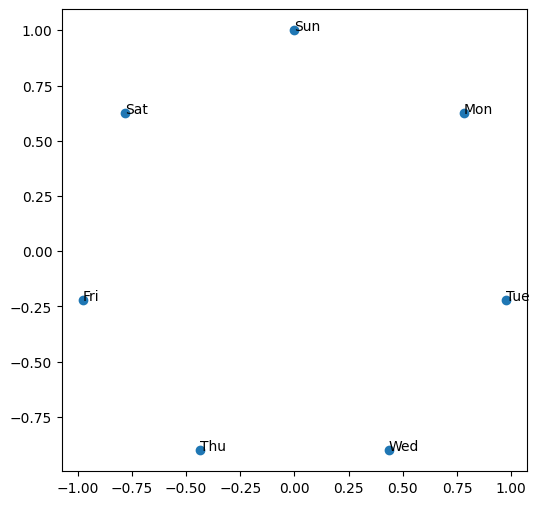

In [ ]:
plt.figure(figsize=(6, 6))  # Decide figure size
plt.scatter(sina, cosa)  # Plot scatter of feature 1 vs feature 2
for i, z in enumerate(
    ("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun")
):  # for each day in a week
    plt.text(sina[i], cosa[i], s=z)  # add text labels to plot

Что делать дальше? По сути, мы уже все сделали. Теперь расстояния между понедельником и вторником и воскресеньем и понедельником одинаковые:

In [ ]:
dist_mon_tue = (sina[1] - sina[0]) ** 2 + (
    cosa[1] - cosa[0]
) ** 2  # distance between Monday and Tuesday
dist_sun_mon = (sina[6] - sina[0]) ** 2 + (
    cosa[6] - cosa[0]
) ** 2  # distance between Sunday and Monday
print("Distance between Mon-Tue = %.2f" % dist_mon_tue)
print("Distance between Sun-Mon = %.2f" % dist_sun_mon)

Distance between Mon-Tue = 0.75
Distance between Sun-Mon = 0.75


То же самое верно и для любых отстоящих друг от друга на одинаковое число дней



In [ ]:
dist_mon_wed = (sina[2] - sina[0]) ** 2 + (
    cosa[2] - cosa[0]
) ** 2  # distance between Monday and Wednesday
dist_fri_sun = (sina[4] - sina[6]) ** 2 + (
    cosa[4] - cosa[6]
) ** 2  # distance between Friday and Sunday
print("Distance between Mon-Wed = %.2f" % dist_mon_wed)
print("Distance between Fri-Sun = %.2f" % dist_fri_sun)

Distance between Mon-Wed = 2.45
Distance between Fri-Sun = 2.45


Таким образом, циклические признаки можно кодировать парой признаков (sin и cos), полученных по схеме, описанной выше.



Проблемы подхода:

1. Деревья решений могут решить задачу и так. А такое кодирование им, наоборот, будет мешать, т.к. они работают с одним признаком за раз.

2. Надо понимать, что важность исходной категориальной фичи неочевидным образом делится между двумя полученными из нее таким образом фичами.

3. В некоторых задачах one-hot работает лучше.

### Вещественных признаков



#### Бинаризация

Для ряда задач может быть неважно конкретное значение признака. Важнее может оказаться факт превышения порога или наличия значения.

Например, уровень сахара крови выше $11.1$ ммоль/л может говорить о наличии у пациента сахарного диабета, что повлияет на результат лечения. А наличие высшего образования больше влияет на платежеспособность, чем средний балл диплома.

Для таких признаков можно попробовать использовать бинаризацию: превращение вещественного признака в бинарный по принципу “есть ли значение” или “больше ли значение определенного порога”.

Отойдем в сторону от Титаника и бинаризируем уровень сахара в крови.

In [ ]:
from sklearn.preprocessing import Binarizer

# fmt: off
x = np.array([[1, 12],
              [2, 7.6],
              [3, 8.4],
              [4, 13.5],
              [5, 6.3]])
# fmt: on

transformer = Binarizer(threshold=11.1)
binarized = transformer.transform(np.expand_dims(x[:, 1], axis=1))

x_binarized = np.concatenate((x, binarized), axis=1)

print(x_binarized)

[[ 1.  12.   1. ]
 [ 2.   7.6  0. ]
 [ 3.   8.4  0. ]
 [ 4.  13.5  1. ]
 [ 5.   6.3  0. ]]


#### Округление

Часто данные доходят до нас с очень высокой точностью после запятой. Нужно ли это нашей модели? Часто нет. Иногда по факту два наблюдения не различаются  по этому признаку (разница в пределах статошибки), но по признаку их отличить можно. Это может приводить к переобучению. В таких случаях разумно признаки округлить. Для этого полезно знать погрешность метода получения данных.

Например, есть признак со значением $\hat{x}=21.497263$ и погрешностью измерения $\Delta{x}=0.6294302$. Имеет смысл округлить значение признака до $x = 21.5$ с погрешностью $\pm 0.6$.
Подробнее про [расчет погрешности](http://www.sai.msu.ru/ao/speccourses/posobiya/Mitin_rusakov.pdf) и [округление](http://genphys.phys.msu.ru/rus/ofp/CanYouRound.pdf) можно почитать по ссылкам.

In [ ]:
# fmt: off
x = np.array([[1, 12.121143145],
              [2, 7.69458475974059],
              [3, 8.434243214],
              [4, 13.5958347545],
              [5, 6.3323294098]])
# fmt: on

round_func = np.around(np.expand_dims(x[:, 1], axis=1), decimals=1)
x_round = np.concatenate((np.expand_dims(x[:, 0], axis=1), round_func), axis=1)

print(x_round)

[[ 1.  12.1]
 [ 2.   7.7]
 [ 3.   8.4]
 [ 4.  13.6]
 [ 5.   6.3]]


#### Binning (Бинирование)

Нам могут быть не интересны точные значения (например, что видео набрало 1000 лайков, а не 1001).

К тому же, число просмотров/лайков некоторых видео может быть очень большим в сравнении с остальными, что будет приводить к неадекватному поведению.
В итоге часть значений у нас встречается часто, а часть — очень редко, что
негативно скажется на результате работы модели.

Бинирование — это метод группировки вещественных признаков в несколько категорий, определяемых диапазонами значений. При этом категория может кодироваться средним или медианным значением признака в диапазоне данной категории.

##### Fixed-width binning

Просто бьем наши значения по диапазонам фиксированной длины. Так часто поступают с возрастом.




Гистограмма возраста разработчика

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/fixed_width_binning.png" width="400">

##### Binning by Instinct
Длина диапазона не всегда обязана быть кратна определенному значению, например 10 годам. В социальных исследованиях может быть полезным разделение на возрастные группы, которые определяются занятостью: школьники, студенты, выпускники, пенсионеры и т.д. Бинирование на основе личного понимания данных называют Binning by Instinct.

##### Adaptive Binning

Binning с фиксированной длиной бина или с использованием личного понимания данных не всегда работает хорошо. Полезно визуализировать результат разбиения.
Например, рассмотрим распределение дохода разработчиков. Оно сильно скошено вправо.



Гистограмма дохода разработчика

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/adaptive_binning.png" width="400">

Бинирование с фиксированной длиной бина не поможет справиться с редкими значениями.

В этой ситуации помогает бинирование, например, по квантилям — когда границы бина расставляются таким образом, чтобы между ними помещалась $1/4$ выборки.

Гистограмма дохода разработчика с квантилями

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/quantiles_binning.png" width="400">

#### Логарифмирование

С ситуацией, когда распределение скошено вправо, работает и другой подход: прологаримфировать величину.


Гистограмма дохода разработчика после логарифмирования

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/log_binning.png" width="400">

Обобщением этого подхода является [Box-Cox Transform](https://www.statisticshowto.com/box-cox-transformation/#:~:text=A%20Box%20Cox%20transformation%20is,a%20broader%20number%20of%20tests.), общей целью которой является придать данным вид, более похожий на нормальное распределение, с которым работает бoльшее число моделей и сходимость которого лучше.

В датасете Titanic отстался важный признак Age. Посмотрим, как он связан с выживаемостью.

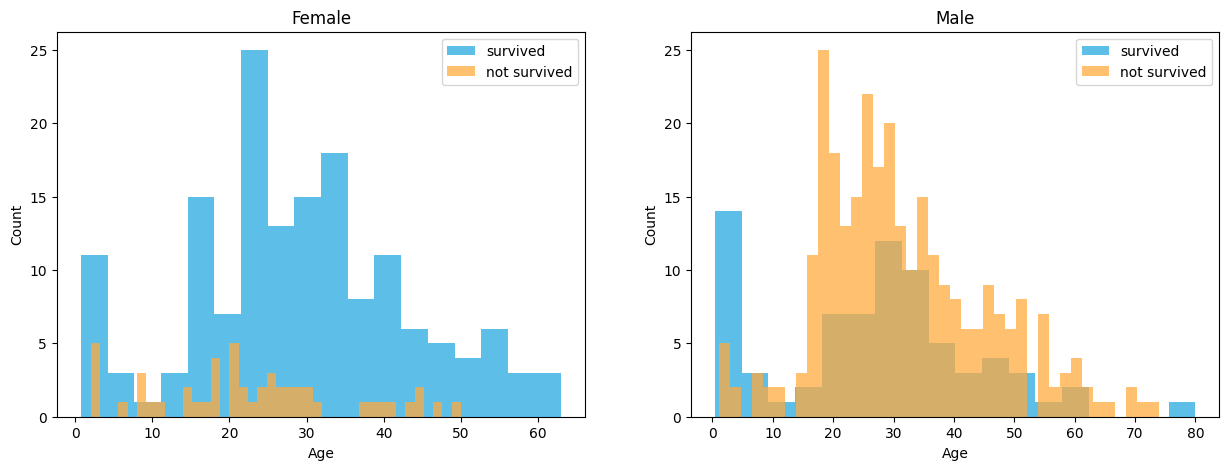

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

train_df = x_train.copy()
train_df["Survived"] = y_train

women = train_df[train_df["Sex"] == "female"]
men = train_df[train_df["Sex"] == "male"]

ax = sns.histplot(
    women[women["Survived"] == 1].Age.dropna(),
    bins=18,
    label="survived",
    ax=axes[0],
    kde=False,
    color="#27a9e1",
    linewidth=0,
)
ax = sns.histplot(
    women[women["Survived"] == 0].Age.dropna(),
    bins=40,
    label="not survived",
    ax=axes[0],
    kde=False,
    color="#ffab40",
    linewidth=0,
)
ax.legend()
ax.set_title("Female")

ax = sns.histplot(
    men[men["Survived"] == 1].Age.dropna(),
    bins=18,
    label="survived",
    ax=axes[1],
    kde=False,
    color="#27a9e1",
    linewidth=0,
)
ax = sns.histplot(
    men[men["Survived"] == 0].Age.dropna(),
    bins=40,
    label="not survived",
    ax=axes[1],
    kde=False,
    color="#ffab40",
    linewidth=0,
)
ax.legend()
ax.set_title("Male")
plt.show()

Тут можно экспериментировать с бинированием, но мы поступим проще. Вспомним, что в поле Title зашита общая информация о возрасте, посчитаем матожидание и дисперсию возраста для Title и сгенерируем недостающие значения.

In [ ]:
np.random.seed(42)

train_df = x_train.copy()
train_df["Title"] = x_train_working["Title"]

mean = {}
std = {}
for title in range(5):
    data = train_df.loc[train_df["Title"] == title]
    mean[title] = data["Age"].mean()
    std[title] = data["Age"].std()


def add_age_val(data, mean, std):
    for i, row in data.iterrows():
        if np.isnan(row["Age"]):
            title = int(row["Title"])
            data.loc[i, "Age"] = round(
                np.random.uniform(
                    low=int(mean[title] - std[title]),
                    high=int(mean[title] + std[title]),
                ),
                1,
            )
    return data

In [ ]:
x_train_working["Age"] = x_train["Age"]
x_test_working["Age"] = x_test["Age"]

x_train_working = add_age_val(x_train_working, mean, std)
x_test_working = add_age_val(x_test_working, mean, std)

x_train_working[:5]

SibSp  Parch     Fare  Pclass  Sex  Embarked  Title   Age
331      0      0  28.5000       1    1         0      4  45.5
733      0      0  13.0000       2    1         0      4  23.0
382      0      0   7.9250       3    1         0      4  32.0
704      1      0   7.8542       3    1         0      4  26.0
813      4      2  31.2750       3    0         0      3   6.0

Посмотрим, что получилось на обработанных данных.

In [ ]:
rf = RandomForestClassifier(random_state=42)

rf.fit(x_train_working, y_train)
y_pred = rf.predict(x_test_working)

print(accuracy_score(y_test, y_pred))

0.8212290502793296


### Кодирование взаимодействия признаков

Признаки могут по-разному взаимодейстовать, и некоторые модели в принципе не могут моделировать это взаимодействие.

Посмотрим это на игрушечном примере. Сгенерируем данные и попробуем решить задачу классификации с помощью линейной модели.

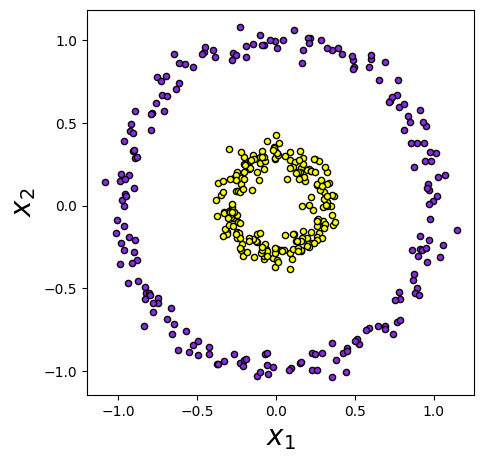

In [ ]:
from sklearn.datasets import make_circles

np.random.seed(42)

x, y = make_circles(n_samples=400, factor=0.3, noise=0.05, random_state=42)

plt.figure(figsize=(5, 5))
violet = y == 0
yellow = y == 1

plt.scatter(x[violet, 0], x[violet, 1], c="blueviolet", s=20, edgecolor="k")
plt.scatter(x[yellow, 0], x[yellow, 1], c="yellow", s=20, edgecolor="k")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
plt.show()

Видно, что тут нельзя провести плоскость, которая хорошо разделит наши классы.

Обучим модель и оценим точность.

In [ ]:
from sklearn.linear_model import LogisticRegression

# We make a 80/20% train/test split of the data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Make predictions
print("Accuracy of the model = %.2f" % model.score(x_test, y_test))

Accuracy of the model = 0.65


Понимание взаимодействия признаков может упростить решаемую задачу. Например, введение нового признака $z= x_1^2+x_2^2$ для наших данных позволит линейной модели решить задачу классификации. Добавим этот признак:

In [ ]:
df = pd.DataFrame(x, columns=["x_1", "x_2"])
df["z"] = x[:, 0] ** 2 + x[:, 1] ** 2
df

x_1       x_2         z
0    0.261024  0.122538  0.083149
1   -0.245087  0.202270  0.100981
2    0.489471  0.882643  1.018641
3    0.368505  0.055743  0.138904
4   -0.981276  0.193832  1.000475
..        ...       ...       ...
395 -0.617948  0.865083  1.130229
396 -0.898005 -0.210396  0.850679
397 -0.089725  0.296459  0.095939
398  0.099591 -0.320610  0.112709
399 -1.015698 -0.164124  1.058579

[400 rows x 3 columns]

Обучим модель с новым признаком:

In [ ]:
# We make a 80/20% train/test split of the data
x_train, x_test, y_train, y_test = train_test_split(
    df.values, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Make predictions
print("Accuracy of the model = %.2f" % model.score(x_test, y_test))

Accuracy of the model = 1.00


Как мы видим, наша линейная модель теперь полностью решает задачу. Визуализируем данные с новым признаком:

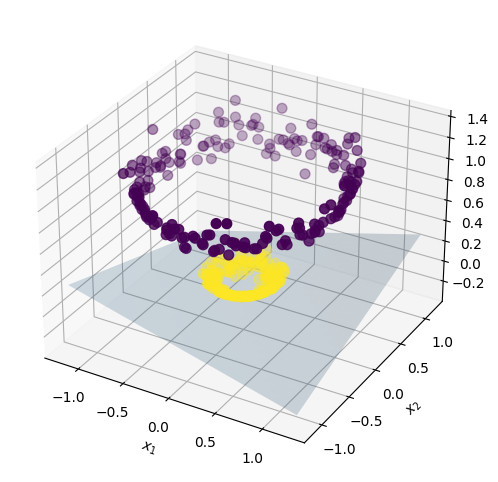

In [ ]:
def plot_data(x, y, total_len=400, s=50, threshold=21.5):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(xs=x[:, 0], ys=x[:, 1], zs=x[:, 2], c=y, s=s)
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    ax.plot_surface(XX, YY, XX * YY * 0.2, alpha=0.2)
    ax.set(xlabel="$x_1$", ylabel="$x_2$", zlabel="$z$")
    return ax


total_len = 400

ax = plot_data(df.values, y, total_len=total_len)

Могут быть и более высокоуровневые взаимодействия, когда взаимодействуют много разных признаков.

Взаимодействия могут быть самые разные — много способов кодировать. Например, добавлять в число признаков их произведение, возводить в степень, брать логарифм и множество других вариаций.

### Генерация признаков при помощи модели

Если у вас есть модель, обученная на другом датасете, можно генерировать признаки при помощи нее. Например, при помощи случайного леса.

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/generating_features_using_model.png" width="700">

<em>**Генерация бинарного признакового пространства с помощью RandomForest**</em>

Хорошие источники:

1. [Feature Selection for High-Dimensional Data](https://www.springer.com/gp/book/9783319218571)
2. [How to Win a Data Science Competition: Learn from Top Kagglers](https://blog.coursera.org/learn-top-kagglers-win-data-science-competition/)
3. [Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists Paperback](https://books.google.ru/books/about/Feature_Engineering_for_Machine_Learning.html?id=Ho0UvgAACAAJ&redir_esc=y)
4. [Сайт](https://dyakonov.org/) и [курс](https://github.com/Dyakonov/PZAD) Дьяконова
5. [A Few Useful Things to Know About Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
6. [Про кодирование циклических признаков](http://blog.davidkaleko.com/feature-engineering-cyclical-features.html)

## Практический пример работы с признаками

Попробуем обработать данные по-другому.

In [ ]:
dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/titanic.csv"
)  # Load the data using pandas
dataset[:5]  # Show the first 5 lines

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

1. Часть полей можно исключить (имя);

2. Часть можно преобразовать в числа (пол, порт посадки ...);

3. Непрерывные данные можно нормировать (здесь вместо этого берется квадратный корень из цены);

4. На основании некоторых можно создать новые, более полезные для модели (номер кабины).


cabin_data = array(["C65", "", "E36", "C54", "B57 B59 B63 B66"])
->
[['C', 65, 1], ['X', -1, 0], ['E', 36, 1], ['C', 54, 1], ['B', 57, 4]]


In [ ]:
# The categorical-to-numerical function
# Changed to automatically add column names
def cat_to_num(data):  # one-hot encoding
    categories = set(data)
    features = {}
    for cat in categories:
        binary = data == cat
        if len(set(binary)) == 1:
            # Ignore features where all values equal
            continue
        new_key = f"{data.name}={cat}"

        features[new_key] = binary.astype("int")
    return pd.DataFrame(features)


def cabin_features(data):
    features = []
    for cabin in data:
        cabins = str(cabin).split(" ")
        n_cabins = len(cabins)
        # First char is the cabin_char
        try:
            cabin_char = cabins[0][0]
        except IndexError:
            cabin_char = "X"
            n_cabins = 0
        # The rest is the cabin number
        try:
            cabin_num = int(cabins[0][1:])
        except:
            cabin_num = -1
        # Add 3 features for each passanger
        features.append([cabin_char, cabin_num, n_cabins])
    features = np.array(features)
    dic_of_features = {
        "Cabin_num": features[:, 1].astype("int"),
        "N_cabins": features[:, 2].astype("int"),
    }
    out = pd.DataFrame(dic_of_features)
    char_column = pd.DataFrame({"Cabin_char": features[:, 0]})
    cabin_ch = cat_to_num(char_column["Cabin_char"])
    return out.join(cabin_ch)


def prepare_data(data):
    """Takes a dataframe of raw data and returns ML model features"""

    # Initially, we build a model only on the available numerical values
    features = data.drop(
        [
            "PassengerId",
            "Survived",
            "Fare",
            "Name",
            "Sex",
            "Ticket",
            "Cabin",
            "Embarked",
        ],
        axis=1,
    )

    # Setting missing age values to -1
    features["Age"] = data["Age"].fillna(-1)

    # Adding the sqrt of the fare feature
    features["sqrt_Fare"] = np.sqrt(data["Fare"])

    # Adding gender categorical value
    features = features.join(cat_to_num(data["Sex"]))

    # Adding Embarked categorical value
    features = features.join(cat_to_num(data["Embarked"]))

    # Split cabin
    features = features.join(cabin_features(data["Cabin"]))

    return features


features = prepare_data(dataset)  # Create variable features
features[:5]  # Display first 5 rows

Pclass   Age  SibSp  Parch  sqrt_Fare  Sex=male  Sex=female  Embarked=C  \
0       3  22.0      1      0   2.692582         1           0           0   
1       1  38.0      1      0   8.442944         0           1           1   
2       3  26.0      0      0   2.815138         0           1           0   
3       1  35.0      1      0   7.286975         0           1           0   
4       3  35.0      0      0   2.837252         1           0           0   

   Embarked=S  Embarked=Q  ...  N_cabins  Cabin_char=T  Cabin_char=F  \
0           1           0  ...         1             0             0   
1           0           0  ...         1             0             0   
2           1           0  ...         1             0             0   
3           1           0  ...         1             0             0   
4           1           0  ...         1             0             0   

   Cabin_char=G  Cabin_char=C  Cabin_char=E  Cabin_char=B  Cabin_char=A  \
0             0             0             0             0             0   
1             0             1             0             0             0   
2             0             0             0             0             0   
3             0             1             0             0             0   
4             0             0             0             0             0   

   Cabin_char=n  Cabin_char=D  
0             1             0  
1             0             0  
2             1             0  
3             0             0  
4             1             0  

[5 rows x 21 columns]

Теперь модель можно обучать:

In [ ]:
# We make a 80/20% train/test split of the data
features = prepare_data(dataset)
x_train, x_test, y_train, y_test = train_test_split(
    features, dataset["Survived"], test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Make predictions
print("Accuracy of the model = %.2f" % model.score(x_test, y_test))

Accuracy of the model = 0.78


В первый раз мы обработали признаки лучше. Вероятно, это связанно с оценкой Age через Title.

### sklearn.preprocessing

Для целей предварительной обработки признаков существует множество инструментов, в том числе модуль preprocessing в пакете sklearn.

Аналогичные подмодули или целые библиотеки есть и для разных задач, связанных с нейронными сетями (torchvision, torchaudio и прочее)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder

# Make one shot encoded representation
one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(
            sparse_output=False,  # if False return array, if True return sparse matrix
            handle_unknown="ignore",
        ),  #  ignore if an unknown categorical feature is present during transform
        make_column_selector(dtype_include="category"),
    ),  # selection of dtypes to include
    remainder="passthrough",
)  # all columns that were not specified in transformers will be  passed through

In [ ]:
# preprocessing features using sklearn.preprocessing
features = dataset.drop(
    ["PassengerId", "Survived", "Fare", "Name", "Sex", "Ticket", "Cabin", "Embarked"],
    axis=1,
)
# make Cabin features, examples: None -> 'X', C85 -> 'C', B42 -> 'B'
features["Cabin"] = (
    dataset["Cabin"].fillna("X").apply(lambda x: x[0]).astype("category")
)


def get_cab_num(cab):
    try:
        return int(cab.split()[0][1:])  # get cabin num (C85 -> 85)
    except:
        return -1  # if dont know num, return -1 (X -> -1)


features["Cabin_num"] = (
    dataset["Cabin"].fillna("X").apply(lambda x: get_cab_num(x))
)  # get cabin num

features["N_cabins"] = (
    dataset["Cabin"].fillna("X").str.split(" ").apply(lambda x: len(x))
)  # num of cabins (C23 C25 C27 -> 3)

features["Sex"] = dataset["Sex"].astype("category")  # male/female

features["Embarked"] = (
    dataset["Embarked"].fillna("X").astype("category")
)  # Categories: ['C', 'Q', 'S', 'X']
features["sqrt_Fare"] = np.sqrt(dataset["Fare"])  # normalize by sqrt
features["Age"] = dataset["Age"].fillna(-1)  # NaN -> -1

In [ ]:
# 80/20% train/test split of the data
x_train, x_test, y_train, y_test = train_test_split(
    features, dataset["Survived"], test_size=0.2, random_state=42
)

In [ ]:
one_hot_encoder.fit(x_train)  # fit one-hot encoder to x_train
x_train_ohe = one_hot_encoder.transform(
    x_train
)  # transform x_train with the one-hot encoder
x_test_ohe = one_hot_encoder.transform(
    x_test
)  # transform x_test with the one-hot encoder

In [ ]:
model = LogisticRegression(max_iter=1000)  # specify maximum iterations
model.fit(x_train_ohe, y_train)  # fit model to the training data

# Make predictions
print(
    "Accuracy of the model = %.2f" % model.score(x_test_ohe, y_test)
)  # calculate the accuracy of the model

Accuracy of the model = 0.78


### Добавление в модель признаков, полученных на основе другой модели

Рассмотрим пример, в котором для кодирования значений признаков используется результат работы ансамбля деревьев, а затем на закодированных данных обучается линейная модель.

В этом примере сначала на отдельной выборке обучается ансамбль деревьев (случайный лес и градиентный бустинг), и каждому листу каждого дерева в ансамбле присваивается уникальный индекс.

Для кодирования с помощью обученного ансамбля каждый объект проходит по всем деревьям. В каждом дереве он оказывается в одном из листьев и получает в качестве нового признака индекс этого листа. Таким образом создается новое пространство признаков. После этого новые признаки (индексы листьев) кодируются по принципу one-hot ecnoding.

Для начала создадим датасет и разобьем его на три отдельные части:
* часть для обучения ансамбля деревьев;
* часть для обучения линейной модели;
* часть для тестирования линейной модели.

Важно обучать ансамбль деревьев на ином подмножестве обучающих данных, чем модель линейной регрессии, чтобы избежать переобучения, в частности, если общее количество листьев окажется равно количеству обучающих образцов или близко к нему.

In [ ]:
### https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py
from sklearn.datasets import make_classification

np.random.seed(42)

# define dummy dataset
x, y = make_classification(n_samples=80000, random_state=42)

# split dataset into subsets for training ensemble and linear model and final testing of the linear model
x_full_train, x_test, y_full_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=42
)

# split training subset into parts for ensemble training and for linear model training
x_train_ensemble, x_train_linear, y_train_ensemble, y_train_linear = train_test_split(
    x_full_train, y_full_train, test_size=0.5, random_state=42
)

Теперь можем обучить ансабли на специально отложенных для этого данных, а затем применить их для кодирования обучающей и тестовой выборок для линейной модели. На закодированных данных мы обучаем модель логистической регрессии, а затем строим ROC-кривые, чтобы сравнить качество разных подходов.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve

n_estimator = 10

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator, random_state=42)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression(max_iter=1000)

rf.fit(x_train_ensemble, y_train_ensemble)
rf_enc.fit(rf.apply(x_train_ensemble))  # apply method return leaf indices
rf_lm.fit(rf_enc.transform(rf.apply(x_train_linear)), y_train_linear)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(x_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)


# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator, random_state=42)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression(max_iter=1000)

grd.fit(x_train_ensemble, y_train_ensemble)
grd_enc.fit(grd.apply(x_train_ensemble)[:, :, 0])  # apply method return leaf indices
grd_lm.fit(grd_enc.transform(grd.apply(x_train_linear)[:, :, 0]), y_train_linear)

y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(grd.apply(x_test)[:, :, 0]))[
    :, 1
]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

Также для сравнения протестируем обученные ансамбли на той же тестовой выборке.

In [ ]:
# The random forest model by itself
y_pred_rf = rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(x_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

Построим ROC-кривые для четырех моделей:
* случайный лес, обученный на исходных данных;
* логистическая регрессия, обученная на данных, закодированных с помощью случайного леса;
* градиентный бустинг, обученный на исходных данных;
* логистическая регрессия, обученная на данных, закодированных с помощью градиентного бустинга.

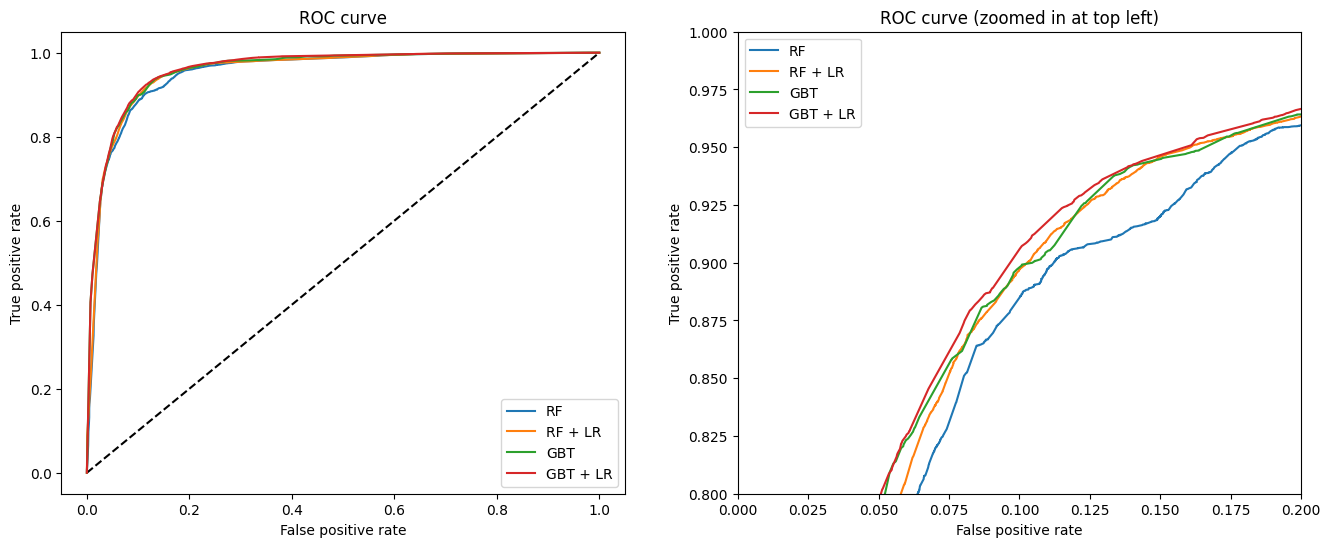

In [ ]:
# Plot figure 1 and figure 2 with subplots
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax1.plot([0, 1], [0, 1], "k--")
ax1.plot(fpr_rf, tpr_rf, label="RF")
ax1.plot(fpr_rf_lm, tpr_rf_lm, label="RF + LR")
ax1.plot(fpr_grd, tpr_grd, label="GBT")
ax1.plot(fpr_grd_lm, tpr_grd_lm, label="GBT + LR")
ax1.set_xlabel("False positive rate")
ax1.set_ylabel("True positive rate")
ax1.set_title("ROC curve")
ax1.legend(loc="best")

ax2.set_xlim(0, 0.2)
ax2.set_ylim(0.8, 1)
ax2.plot([0, 1], [0, 1], "k--")
ax2.plot(fpr_rf, tpr_rf, label="RF")
ax2.plot(fpr_rf_lm, tpr_rf_lm, label="RF + LR")
ax2.plot(fpr_grd, tpr_grd, label="GBT")
ax2.plot(fpr_grd_lm, tpr_grd_lm, label="GBT + LR")
ax2.set_xlabel("False positive rate")
ax2.set_ylabel("True positive rate")
ax2.set_title("ROC curve (zoomed in at top left)")
ax2.legend(loc="best")

plt.show()

На этом модельном примере видим, что применение комбинации моделей (кодирование данных с помощью ансамбля деревьев и классификация с помощью линейной модели) позволяет достичь более высокого качества классификации.

## Примеры данных, которые нецелесообразно отправлять в модель в сыром виде

**1. Закодированные данные, полученные по некоторой известной конвенции.**

Иногда данные могут не содержать значимую информацию непосредственно, а лишь являться ссылкой на неё. Очевидными примерами таких данных можно назвать:
- IP адрес;
- почтовый индекс;
- номер мобильного телефона;
- шифр специальности ВАК;
- ...

Так, в случае анализа содержащих IP адреса данных, представляется куда более целесообразным предварительно извлечь содержащуюся информацию явно:

xxx.xxx.xxx.xxx -> регион, провайдер.

Мы неявно требуем, отправляя данные такого типа в модель в сыром виде, чтобы модель научилась самостоятельно их расшифровывать и интерпретировать.

**2. Данные, записанные в неинвариантной форме**

Рассмотрим следующий, намеренно упрощенный пример:

> Предположим, мы аккуратно нарисовали на двух разных листах бумаги пару геометрически равных треугольников. На каждом из листов взяли по одному из углов в качестве начала координат соответственно и выписали координаты вершин наших треугольников. Три пары чисел — координаты вершин — наши данные, которые однозначно характеризуют каждый из рассматриваемых треугольников.
Будут ли численно совпадать эти данные для геометрически равных треугольников?

Очевидно, нет. Чтобы можно было сразу определить, равны ли треугольники, по описывающим их данным, вместо координат вершин нам следует описать их в виде набора некоторых _инвариантных_ признаков. Для треугольника это может быть или информация о длинах трех сторон, или длины двух сторон и величина угла между ними, или же длина одной из сторон вместе с величинами прилежащих к ней углов.

Как можно заметить из рассмотренного выше примера, записанные в неинвариантной форме данные могут быть _вырождены_: один и тот же объект может быть описан множеством существенно различных значений признаков.

Примеры:
- периодические данные:
    - временные ряды с выраженной сезонностью;
    - фаза гармонического сигнала;
    - ...
- зависящие от выбора системы координат данные:
    - координаты атомов в молекуле;
    - географические координаты городов на карте;
    - ...

Так, при построении модели предсказания пространственной структуры белка по входящей в него аминокислотной последовательности (см. [AlphaFold](https://yakovlev.me/para-slov-za-alphafold2/)), конструктивный подход предполагает инвариантное описание молекулы в качестве матрицы попарных расстояний между атомами.

Передавая неинвариантные данные модели в сыром виде, приходится нереалистично рассчитывать на то, что модель сама сможет выделить из них значащие инвариантные свойства исследуемых объектов.

# Отбор признаков

В прошлых лекциях вы познакомились с тем, что такое признаки. Сегодня мы попытаемся научиться отделять полезные признаки от бесполезных, а также понижать размерность пространства признаков.

## Зачем отбирать признаки

**Количество признаков в данных может оказаться избыточным**:
- могут существовать группы признаков, которые лишь при совместном рассмотрении могут оказаться значимыми для решаемой задачи;
- некоторые признаки могут оказаться в наборе данных исключительно из-за желания использовать всю имеющуюся информацию и на самом деле быть никак не связны с целевой переменной.

*В первом случае* логично предложить замену группы зависимых признаков через объединение их в один новый композитный признак. Замена группы старых признаков новым может позволить сохранить всю значимую информацию, одновременно избавляясь от проблемы избыточного описания данных.

*Во втором случае* можно ожидать улучшение качества предсказания модели, если удастся отфильтровать действительно важные признаки. Включение в данные *не важных* признаков, очевидно, не может улучшить качество обученной на таких данных модели, но, как ни странно, может значительно ухудшить.

**Некоторые признаки могут оказаться шумом**

Предположим, мы добавили в набор данных для обучения некоторой модели регрессии несколько тысяч вещественных признаков, которые представляют собой случайные числа из стандартного нормального распределения — белый шум. Случайные числа, очевидно, никак не могут быть связаны с нашей целевой переменной. Тем не менее, в силу большого числа таких шумовых признаков, значения некоторых из них могут оказаться случайно скоррелированы со значениям нашей целевой переменной в рамках обучающей выборки. Обученная на таких данных модель будет стараться предсказывать целевую переменную, явно учитывая значения признаков, которые на самом деле не имеют никакого смысла. При попытке построения предсказания данной моделью на тестовой выборке мы неизбежно заметим значительное снижение качества предсказания. Полученная модель обладает плохой обобщающей способностью.

В более общем случае можно говорить, что в многомерном пространстве почти всегда можно найти корреляции:

<center><img src="https://edunet.kea.su/repo/EduNet-content/L04/out/fake_correlations.png" alt="alttext" width="700"/></center>

<center><em>В многоразмерном пространстве почти всегда можно найти корреляции. Из корреляции не следует причинно-следственная связь.</em></center>

<center><em>Source: <a href="https://tylervigen.com/spurious-correlations">Spurious correlations</a></em></center>

[Больше подобных примеров](https://www.wnycstudios.org/podcasts/otm/articles/spurious-correlations)

**Скорость работы модели часто имеет значение**

Кроме того, в практически важных задачах часто приходится искать компромисс между точностью предсказания модели и необходимым для его получения временем. Спектр таких задач достаточно широк: от проблем построения быстрых систем ранжирования рекламных объявлений в интернет-маркетинге до построения быстрых систем распознавания сложных событий на ускорителях заряженных частиц. Вычислительная сложность модели, очевидно, растёт с увеличением числа входных признаков, поэтому работающие с меньшим числом признаков модели являются для таких задач предпочтительными.

## Полный перебор

Можно попытаться перебрать все возможные комбинации признаков. Но даже для 100  признаков такой подход будет считаться до конца Вселенной.

Потому прибегают к эвристикам, которые, очевидно, могут пропускать оптимальное решение

## Одномерный отбор признаков

Самый простой подход к отбору признаков — это одномерный подход. В нём оценивается связь каждого признака с целевой переменной, например, измеряется корреляция. Такой подход довольно простой, он не учитывает сложные закономерности, в нём все признаки считаются независимыми, тогда как в машинном обучении модели учитывают взаимное влияние признаков, их пар или даже более сложные действия на целевую переменную.


### Формализация задачи

Пусть у нас есть $N$ объектов с $K$ признаками, и для каждого объекта задана целевая переменная или ответ. Обозначим  матрицу объектов-признаков через $X \in \mathbf{R}^{N \times M} $, а вектор ответов через $Y$. Для удобства введем следующие дополнительные обозначения:

* $\overline{X_j}$ — среднее значение признака $j$ по всей выборке;
* $\overline{Y}$ — среднее значение целевой переменной на всей выборке.

Задача — оценить предсказательную силу (информативность) каждого признака, то есть насколько хорошо по данному признаку можно предсказывать целевую переменную. Данные оцененной информативности можно использовать, чтобы отобрать $K$ лучших признаков или признаки, у которых значение информативности больше порога (например, некоторой квантили распределения информативности).

### Корреляция

Один из самых простых методов измерения связи между признаком и ответами — это корреляция. Корреля́ция (от лат. correlatio «соотношение»), или корреляцио́нная зави́симость — статистическая взаимосвязь двух или более случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми). При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин.

Коэффициент корреляции по признаку $j$ $\left(R_j\right)$ определяется формулой:

$$R_j = \frac{\sum_{i=1}^{N} \left(X_{ij} - \overline{X_j}\right)\left(Y_{i} - \overline{Y}\right)} {\sqrt{ \sum_{i=1}^{N}\left(X_{ij} - \overline{X_j}\right)^2\sum_{i=1}^{N} \left(Y_{i} - \overline{Y}\right)^2}}$$

Чем больше по модулю корреляция между признаком и целевой переменной, тем более информативным является данный признак. При этом она максимальна по модулю $\left(R_j = \pm1\right)$, если между признаком и целевой переменной есть **линейная связь**, то есть если целевую переменную можно строго линейно выразить через значение признака. Это означает, что корреляция измеряет только линейную информативность, то есть способность признака линейно предсказывать целевую переменную. Вообще говоря, корреляция рассчитана на вещественные признаки и вещественные ответы. Тем не менее, её можно использовать в случае, если признаки и ответы бинарные (имеет смысл кодировать бинарный признак с помощью значений $\pm1$)

In [ ]:
import pandas as pd

dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/titanic.csv"
)  # Load the data using pandas
dataset.head(5)  # Show the first 5 lines

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
import numpy as np


# The categorical-to-numerical function
# Changed to automatically add column names
def cat_to_num(data):  # one-hot encoding
    categories = set(data)
    features = {}
    for cat in categories:
        binary = data == cat
        if len(set(binary)) == 1:
            # Ignore features where all values equal
            continue
        new_key = f"{data.name}={cat}"

        features[new_key] = binary.astype("int")
    return pd.DataFrame(features)


def cabin_features(data):
    features = []
    for cabin in data:
        cabins = str(cabin).split(" ")
        n_cabins = len(cabins)
        # First char is the cabin_char
        try:
            cabin_char = cabins[0][0]
        except IndexError:
            cabin_char = "X"
            n_cabins = 0
        # The rest is the cabin number
        try:
            cabin_num = int(cabins[0][1:])
        except:
            cabin_num = -1
        # Add 3 features for each passanger
        features.append([cabin_char, cabin_num, n_cabins])
    features = np.array(features)
    dic_of_features = {
        "Cabin_num": features[:, 1].astype("int"),
        "N_cabins": features[:, 2].astype("int"),
    }
    out = pd.DataFrame(dic_of_features)
    char_column = pd.DataFrame({"Cabin_char": features[:, 0]})
    cabin_ch = cat_to_num(char_column["Cabin_char"])
    return out.join(cabin_ch)


def prepare_data(data):
    """Takes a dataframe of raw data and returns ML model features"""

    # Initially, we build a model only on the available numerical values
    features = data.drop(
        [
            "PassengerId",
            "Survived",
            "Fare",
            "Name",
            "Sex",
            "Ticket",
            "Cabin",
            "Embarked",
        ],
        axis=1,
    )

    # Setting missing age values to -1
    features["Age"] = data["Age"].fillna(-1)

    # Adding the sqrt of the fare feature
    features["sqrt_Fare"] = np.sqrt(data["Fare"])

    # Adding gender categorical value
    features = features.join(cat_to_num(data["Sex"]))

    # Adding Embarked categorical value
    features = features.join(cat_to_num(data["Embarked"]))

    # Split cabin
    features = features.join(cabin_features(data["Cabin"]))

    return features


features = prepare_data(dataset)  # Create variable features
features.head(5)  # Display first 5 rows

Pclass   Age  SibSp  Parch  sqrt_Fare  Sex=male  Sex=female  Embarked=C  \
0       3  22.0      1      0   2.692582         1           0           0   
1       1  38.0      1      0   8.442944         0           1           1   
2       3  26.0      0      0   2.815138         0           1           0   
3       1  35.0      1      0   7.286975         0           1           0   
4       3  35.0      0      0   2.837252         1           0           0   

   Embarked=S  Embarked=Q  ...  N_cabins  Cabin_char=T  Cabin_char=F  \
0           1           0  ...         1             0             0   
1           0           0  ...         1             0             0   
2           1           0  ...         1             0             0   
3           1           0  ...         1             0             0   
4           1           0  ...         1             0             0   

   Cabin_char=G  Cabin_char=C  Cabin_char=E  Cabin_char=B  Cabin_char=A  \
0             0             0             0             0             0   
1             0             1             0             0             0   
2             0             0             0             0             0   
3             0             1             0             0             0   
4             0             0             0             0             0   

   Cabin_char=n  Cabin_char=D  
0             1             0  
1             0             0  
2             1             0  
3             0             0  
4             1             0  

[5 rows x 21 columns]

In [ ]:
from scipy import stats
from sklearn.model_selection import train_test_split

features = prepare_data(dataset)  # produce feature
x_train, x_test, y_train, y_test = train_test_split(
    features, dataset["Survived"], test_size=0.2, random_state=42
)

correlations = []  # create a storage for correlations
for column in features:
    r, p_value = stats.pearsonr(x_train[column], y_train)  # compute Pearson and R
    correlations.append((column, abs(r)))  # add to storage

df = pd.DataFrame(correlations, columns=["Column", "Correlation"]).sort_values(
    "Correlation", ascending=False
)
df.head(df.shape[0])

Column  Correlation
5       Sex=male     0.541750
6     Sex=female     0.541750
0         Pclass     0.321750
19  Cabin_char=n     0.300371
4      sqrt_Fare     0.295597
10     Cabin_num     0.237024
17  Cabin_char=B     0.176650
7     Embarked=C     0.159632
16  Cabin_char=E     0.144024
8     Embarked=S     0.142371
15  Cabin_char=C     0.127315
20  Cabin_char=D     0.123186
3          Parch     0.078311
13  Cabin_char=F     0.055922
11      N_cabins     0.051495
2          SibSp     0.047602
1            Age     0.043465
12  Cabin_char=T     0.029137
9     Embarked=Q     0.006097
18  Cabin_char=A     0.005813
14  Cabin_char=G     0.005783

Следующая идея такая: давайте посчитаем ROC-AUC по признаку, учитывая его как предсказание модели. Если ROC-AUC высокий (нас интересуют только абсолютные значения), то признак важный.

In [ ]:
from sklearn.metrics import roc_auc_score

features = prepare_data(dataset)
x_train, x_test, y_train, y_test = train_test_split(
    features, dataset["Survived"], test_size=0.2, random_state=42
)


rocs = []  # create a storage for ROCs
for column in features:
    # use feature as score directly
    r1 = roc_auc_score(y_score=x_train[column], y_true=y_train)
    # use feature as score in reversed manner
    r2 = roc_auc_score(y_score=-x_train[column], y_true=y_train)
    r = max(r1, r2)
    rocs.append((column, r))

df = pd.DataFrame(rocs, columns=["Column", "Rocs"]).sort_values(
    "Rocs", ascending=False
)  # sort from highest to lowest
df.head(df.shape[0])

Column      Rocs
6     Sex=female  0.765614
5       Sex=male  0.765614
4      sqrt_Fare  0.677138
0         Pclass  0.673802
10     Cabin_num  0.629328
19  Cabin_char=n  0.629101
8     Embarked=S  0.564660
7     Embarked=C  0.562676
3          Parch  0.558794
17  Cabin_char=B  0.540978
1            Age  0.535687
15  Cabin_char=C  0.534187
2          SibSp  0.533822
16  Cabin_char=E  0.526825
20  Cabin_char=D  0.520489
11      N_cabins  0.507450
13  Cabin_char=F  0.507429
9     Embarked=Q  0.501748
12  Cabin_char=T  0.501126
18  Cabin_char=A  0.500706
14  Cabin_char=G  0.500387

### Проблемы одномерного отбора признаков

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/problems_of_one_dimensional_feature_selection.png" alt="alttext" width="600"/>

У подхода, при котором важности всех признаков оцениваются по отдельности, есть свои недостатки. На левом рисунке изображена двумерная выборка, для которой необходимо решить задачу классификации. Если спроецировать данную выборку на ось абсцисс, то она будет разделима, хотя и будут присутствовать ошибки. Если же спроецировать данную выборку на ось ординат, то все объекты разных классов перемешаются, и выборка будет неразделима. В этом случае при использовании любого метода одномерного оценивания информативности первый признак будет информативен, а второй — совершенно неинформативен.

Тем не менее, видно, что если использовать эти признаки одновременно, то классы будут разделимы идеально. На самом деле, второй признак важен, но он важен только в совокупности с первым, и методы одномерного оценивания информативности не способны это определить. На рисунке справа показана выборка, на которой одномерные методы оценки информативности работают ещё хуже. В этом случае, если спроецировать выборку на ось абсцисс или ординат, то объекты классов перемешаются, и в обоих случаях данные будут совершенно неразделимы. И, согласно любому из описанных методов, оба признака неинформативны. Тем не менее, если использовать их одновременно, то, например, решающее дерево может идеально решить данную задачу классификации.

Пример: влияние роста и веса при предсказании вероятности сердечного заболевания. Избыточный вес может являться важным фактором, но оценить, является ли он избыточным или нормальным, можно только зная рост пациента.

## Жадный отбор признаков

Жадные методы отбора признаков по сути являются надстройками над методами обучения моделей. Они перебирают различные подмножества признаков и выбирают то из них, которое дает наилучшее качество определённой модели машинного обучения.
Данный процесс устроен следующим образом. Обучение модели считается черным ящиком, который на вход принимает информацию о том, какие из его признаков можно использовать при обучении модели, обучает модель, и дальше каким-то методом оценивается качество такой модели, например, по отложенной выборке или кросс-валидации. Таким образом, задача, которую необходимо решить — это оптимизация функционала качества модели по подмножеству признаков.

**Полный перебор**

$S=\{S_1, \dots ,S_n\}$ — множество всех признаков

$\varnothing \;\{S_1\}...\{S_n\}; \{S_1S_2\}, \{S_1S_3\}, \dots , \{S_1S_n\}$

$\{S_2,S_3\}; \{\dots\}; \{S_1 \dots S_n\}$

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/full_sorting.png" width="600"/>

Самый простой способ решения данной задачи — это полный перебор всех подмножеств признаков и оценивание качества на каждом подмножестве. Итоговое подмножество — то, на котором качество модели наилучшее. Этот перебор можно структурировать и перебирать подмножества последовательно: сначала те, которые имеют мощность 1 (наборы из 1 признака), потом наборы мощности 2, и так далее. Это подход очень хороший, он найдет оптимальное подмножество признаков, но при этом очень сложный, поскольку всего таких подмножеств $2^d$, где $d$ — число признаков. Если признаков много — сотни или тысячи, то такой перебор невозможен: он займет слишком много времени, возможно, сотни лет или больше. Поэтому, такой метод подходит либо при небольшом количестве признаков, либо если известно, что информативных признаков очень мало, единицы.

**Жадное добавление**

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/greedy_addition.png" alt="alttext" width="600"/>

Если же признаков много и известно, что многие из них информативны, то нужно применять жадную стратегию. Жадная стратегия используется всегда, когда полный перебор не подходит для решения задачи. Например, может оказаться неплохой стратегия жадного наращивания (жадного добавления). Сначала находится один признак, который дает наилучшее качество модели (наименьшую ошибку $Q$):

$i_1 = argmin Q(i)$.

Тогда множество, состоящее из этого признака:

$J_1 = {i_1}$

Дальше к этому множеству добавляется еще один признак так, чтобы как можно сильнее уменьшить ошибку модели:

$i_2 =argminQ(i_1,i)$, $J_2 ={i_1,i_2}$.

Далее каждый раз добавляется по одному признаку, образуются множества $J_3 , J_4 , . . . .$ Если в какой-то момент невозможно добавить новый признак так, чтобы уменьшить ошибку, процедура останавливается. Жадность процедуры заключается в том, что как только какой-то признак попадает в оптимальное множество, его нельзя оттуда удалить.

[Feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

[Model-based and sequential feature selection](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py)

[Sequential Feature Selection for Regression](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#example-5-sequential-feature-selection-for-regression)

In [ ]:
import joblib
import sys

sys.modules["sklearn.externals.joblib"] = joblib

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

sfs = SequentialFeatureSelector(
    LogisticRegression(max_iter=1000),
    k_features=8,  # number of features to select
    forward=True,
    floating=False,
    scoring="accuracy",
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
)
sfs.fit(x_train, y_train)

df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df.head(df.shape[0])

feature_idx  \
1                         (5,)   
2                       (2, 5)   
3                    (0, 2, 5)   
4                 (0, 2, 3, 5)   
5              (0, 2, 3, 5, 9)   
6          (0, 2, 3, 5, 9, 11)   
7      (0, 2, 3, 5, 9, 11, 12)   
8  (0, 2, 3, 5, 9, 11, 12, 13)   

                                           cv_scores avg_score  \
1  [0.8181818181818182, 0.7482517482517482, 0.753...  0.787935   
2  [0.8181818181818182, 0.7622377622377622, 0.746...   0.79214   
3  [0.8181818181818182, 0.7832167832167832, 0.746...  0.799153   
4  [0.8181818181818182, 0.7832167832167832, 0.746...  0.799153   
5  [0.8181818181818182, 0.7832167832167832, 0.746...  0.800561   
6  [0.8181818181818182, 0.7832167832167832, 0.746...  0.800561   
7  [0.8181818181818182, 0.7832167832167832, 0.746...  0.800561   
8  [0.8181818181818182, 0.7832167832167832, 0.746...  0.800561   

                                       feature_names  ci_bound   std_dev  \
1                                        (Sex=male,)  0.040774  0.031724   
2                                  (SibSp, Sex=male)  0.043685  0.033989   
3                          (Pclass, SibSp, Sex=male)  0.039486  0.030721   
4                   (Pclass, SibSp, Parch, Sex=male)  0.039486  0.030721   
5       (Pclass, SibSp, Parch, Sex=male, Embarked=Q)  0.040679   0.03165   
6  (Pclass, SibSp, Parch, Sex=male, Embarked=Q, N...  0.040679   0.03165   
7  (Pclass, SibSp, Parch, Sex=male, Embarked=Q, N...  0.040679   0.03165   
8  (Pclass, SibSp, Parch, Sex=male, Embarked=Q, N...  0.040679   0.03165   

    std_err  
1  0.015862  
2  0.016994  
3  0.015361  
4  0.015361  
5  0.015825  
6  0.015825  
7  0.015825  
8  0.015825

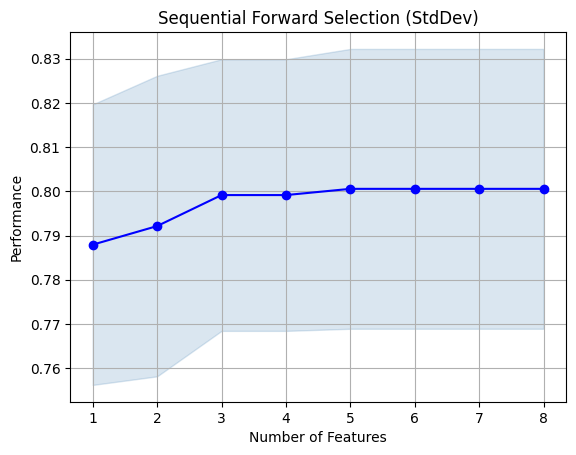

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

plot_sfs(sfs.get_metric_dict(), kind="std_dev")

plt.title("Sequential Forward Selection (StdDev)")
plt.grid()
plt.show()

### ADD-DEL

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/non_greedy.png" width="600">

Описанный выше подход довольно быстрый: в нем столько итераций, сколько признаков в выборке. Но при этом он слишком жадный: перебирается слишком мало вариантов, и мы можем оказаться в плохой локальной точке. Процедуру можно усложнить. Один из подходов к усложнению — это алгоритм **ADD-DEL**, который не только добавляет, но и удаляет признаки из оптимального множества.

Алгоритм начинается с процедуры жадного добавления. Множество признаков наращивается до тех пор, пока получается уменьшить ошибку, затем признаки жадно удаляются из подмножества, то есть перебираются все возможные варианты удаления признака, оценивается ошибка и удаляется тот признак, который приводит к наибольшему уменьшению ошибки на выборке. Эта процедура повторяет добавление и удаление признаков до тех пор, пока уменьшается ошибка. Алгоритм ADD-DEL всё еще жадный, но при этом он менее жадный, чем предыдущий, поскольку *может исправлять ошибки*, сделанные в начале перебора: если вначале был добавлен неинформативный признак, то на этапе удаления от него можно избавиться.

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/add_del.png" width="800">

In [ ]:
sffs = SequentialFeatureSelector(
    LogisticRegression(max_iter=1000),  # represents the classifier
    k_features=8,  # the number of features you want to select
    forward=True,  # add features
    floating=True,  # remove features
    scoring="accuracy",  # means that the selection will be decided by the accuracy of the classifier.
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
)

sffs.fit(x_train.values, y_train)  # performs the actual SFFS algorithm
df = pd.DataFrame.from_dict(sffs.get_metric_dict()).T
df.head(df.shape[0])

feature_idx  \
1                          (5,)   
2                        (2, 5)   
3                     (0, 2, 5)   
4                  (0, 2, 3, 5)   
5               (0, 2, 3, 5, 9)   
6           (0, 2, 3, 5, 9, 11)   
7      (0, 2, 5, 9, 11, 12, 13)   
8  (0, 2, 5, 9, 11, 12, 13, 15)   

                                           cv_scores avg_score  \
1  [0.8181818181818182, 0.7482517482517482, 0.753...  0.787935   
2  [0.8181818181818182, 0.7622377622377622, 0.746...   0.79214   
3  [0.8181818181818182, 0.7832167832167832, 0.746...  0.799153   
4  [0.8181818181818182, 0.7832167832167832, 0.746...  0.799153   
5  [0.8181818181818182, 0.7832167832167832, 0.746...  0.800561   
6  [0.8181818181818182, 0.7832167832167832, 0.746...  0.800561   
7  [0.8181818181818182, 0.7832167832167832, 0.746...   0.80197   
8  [0.8181818181818182, 0.7832167832167832, 0.746...   0.80197   

                  feature_names  ci_bound   std_dev   std_err  
1                          (5,)  0.040774  0.031724  0.015862  
2                        (2, 5)  0.043685  0.033989  0.016994  
3                     (0, 2, 5)  0.039486  0.030721  0.015361  
4                  (0, 2, 3, 5)  0.039486  0.030721  0.015361  
5               (0, 2, 3, 5, 9)  0.040679   0.03165  0.015825  
6           (0, 2, 3, 5, 9, 11)  0.040679   0.03165  0.015825  
7      (0, 2, 5, 9, 11, 12, 13)  0.042151  0.032795  0.016398  
8  (0, 2, 5, 9, 11, 12, 13, 15)  0.042151  0.032795  0.016398

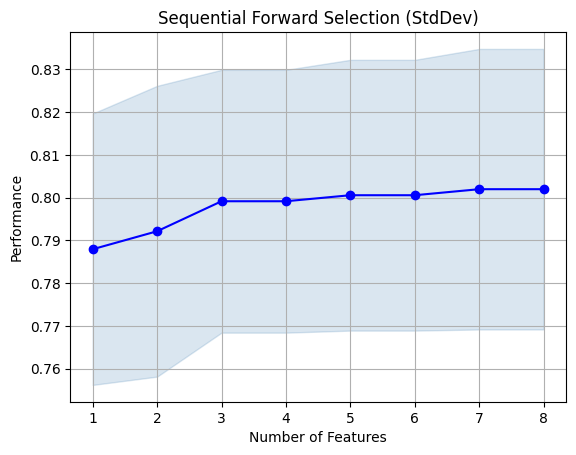

In [ ]:
plot_sfs(sffs.get_metric_dict(), kind="std_dev")

plt.title("Sequential Forward Selection (StdDev)")
plt.grid()
plt.show()

## Отбор признаков на основе моделей


Использование весов признаков

Во многих моделях (например, в линейных) перед признаками стоят веса. Если признаки масштабированы, то веса при признаках можно интерпретировать как информативности: чем больше по модулю вес при признаке $j$, тем больший вклад этот признак вносит в ответ модели. Однако если признаки не масштабированы, то так использовать веса уже нельзя. Например, если есть два признака, и один по масштабу в 1000 раз меньше другого, то вес первого признака может быть очень большим, только чтобы признаки были одинаковыми по масштабу.
Если необходимо обнулить как можно больше весов, чтобы линейная модель учитывала только те признаки, которые наиболее важны для нее, можно использовать L1-регуляризацию. Чем больше коэффициент при L1-регуляризаторе, тем меньше признаков будет использовать линейная модель.

Рассмотрим это на примере Линейного классификатора, который мы конструировали на 2-м занятии.

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/dot_product.png" width="350">

$\boldsymbol{w} \cdot \boldsymbol{x} = w_0 \cdot x_0 + w_1 \cdot x_1 + \cdots + w_{n-1} \cdot x_{n-1} = 1\times1 + 2\times0 + (-1)\times4 + 0\times(-2) = -3$

[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

df = pd.DataFrame(lr.coef_[0], x_train.columns, columns=["Coef"]).sort_values(
    "Coef", key=abs, ascending=False
)
df.head(df.shape[0])

Coef
Sex=female    1.347877
Sex=male     -1.335789
Cabin_char=E  0.852875
Cabin_char=F  0.842839
Cabin_char=G -0.637927
Cabin_char=C -0.557529
Pclass       -0.538057
N_cabins     -0.494651
Cabin_char=n -0.392910
Cabin_char=D  0.378228
Cabin_char=T -0.308945
SibSp        -0.303337
Cabin_char=A -0.287940
Embarked=C    0.216808
Embarked=S   -0.203422
Embarked=Q   -0.131855
Cabin_char=B  0.123397
sqrt_Fare     0.110342
Parch        -0.107805
Age          -0.010998
Cabin_num     0.002733

In [ ]:
from sklearn.feature_selection import SelectFromModel

# 1. A SelectFromModel instance selects the features
# whose coefficients are non-zero when the feature is included in the model.
# 2. The LogisticRegression instance runs the logistic regression
# algorithm on the training data.

# selecting features based on importance weights
lr_selector = SelectFromModel(LogisticRegression(max_iter=1000))
lr_selector.fit(x_train, y_train)

SelectFromModel(estimator=LogisticRegression(max_iter=1000))

In [ ]:
x_train.columns[lr_selector.get_support()]  # Get a mask of the features selected

Index(['Pclass', 'Sex=male', 'Sex=female', 'N_cabins', 'Cabin_char=F',
       'Cabin_char=G', 'Cabin_char=C', 'Cabin_char=E'],
      dtype='object')

In [ ]:
lr_selector.transform(x_train)  # select only relevant features

array([[1., 1., 0., ..., 0., 1., 0.],
       [2., 1., 0., ..., 0., 0., 0.],
       [3., 1., 0., ..., 0., 0., 0.],
       ...,
       [3., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# select features with RFC
rf = RandomForestClassifier(n_estimators=500, random_state=42)

rf_selector = SelectFromModel(rf)
rf_selector.fit(x_train, y_train)  # Fit it on the training data

x_train.columns[rf_selector.get_support()]

Index(['Pclass', 'Age', 'sqrt_Fare', 'Sex=male', 'Sex=female', 'Cabin_num'], dtype='object')

## Randomization/Permutation



Для определения важности признака можно перемешать его значения. Это не изменит форму распределения признака, но сделает его бессмысленным. По падению качества модели мы можем оценить, каков был вклад признака до изменения: если качество упало сильно, то он был значимым.

В sklearn это реализовано как отдельный класс [`permutation_importance`](https://scikit-learn.org/stable/modules/permutation_importance.html).

Изменение качества модели рассчитывается на OOB (**Out-of-bag samples**) объектах: на объектах, которые не вошли в обучающую выборку, а остались для валидации (не путать с тестовой выборкой, которую мы не трогаем).

У данного метода есть три особенности:
1. Значение **важности признака** будет зависеть от **результата перемешивания**, которое носит случайный характер. Поэтому функция `permutation_importance` имеет параметр `n_repeats`, который определяет, сколько раз признак будет перемешиваться случайным образом.
2. Значение **важности признака** будет зависеть от **модели** и того, насколько “удачно” она обучена. “Плохая” и “хорошая” модель могут считать важным разный набор признаков. Поэтому полезно сравнить важность признаков модели, обучив модель на различных выборках (например, используя cross-валидацию).
3. Данный метод неадекватно оценивает **важность коррелированных признаков**.

Когда два признака сильно **коррелированы** и мы перемешали один из них, **линейная модель** сохранит информацию о перемешанном признаке через коррелированный с ним, что может привести к **занижению важности**.

[[Doc sklearn] Misleading values on strongly correlated features](https://scikit-learn.org/stable/modules/permutation_importance.html#misleading-values-on-strongly-correlated-features)

С другой стороны, может произойти обратный эффект.
**Дерево решений** пытается разбить пространство плоскостями, и в областях, где объектов нет, оно, можно сказать, занимается угадыванием. Если $x_1$ и $x_2$ на картинке ниже линейно зависимы, то не может возникнуть ситуация, при которой $x_1 = 0$, а $x_2 = 1$. А как раз при перемешивании такая ситуация возникнет, и точки начнут попадать в "проблемные" области, в которых дерево решений плохо предсказывает. В результате получаем **завышенную важность**.

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L04/quality_out_of_bag_samples.png" width="800"/></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1905.03151.pdf">Unrestricted Permutation forces Extrapolation: Variable Importance Requires at least <br> One More Model oThere Is No Free Variable Importance</a></em></center>

Для борьбы с неадекватной оценкой **коррелированных признаков** можно собирать коррелированные признаки в кластеры и оставить  только один признак для каждого [кластера](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py).

Одна из вариаций `permutation importance` подразумевает **обучение модели заново** после каждого **перемешивания признаков**. Это дает чуть более адекватную оценку важности, но очень долго.

### Пример отбора признаков с помощью permutation importance

Сделаем `permutation importance`:

1. Обучим модель
2. Перемешаем значения в одном столбце (одного признака), сделаем предсказание на валидационном наборе данных и посчитаем ошибку. Ухудшение ошибки покажет важность признака, который перемешали.
3. Возвращаем значения признака и повторяем шаг 2 со всеми остальными признаками

In [ ]:
from sklearn.inspection import permutation_importance

model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(x_train, y_train)

r = permutation_importance(model, x_test, y_test, n_repeats=100, random_state=42)

df = pd.DataFrame({"name": x_train.columns, "imp": r.importances_mean}).sort_values(
    "imp", ascending=False
)
df

name       imp
6     Sex=female  0.048994
5       Sex=male  0.023240
0         Pclass  0.022514
4      sqrt_Fare  0.022291
1            Age  0.010447
3          Parch  0.010223
16  Cabin_char=E  0.009609
7     Embarked=C  0.002626
2          SibSp  0.002235
8     Embarked=S  0.001844
20  Cabin_char=D  0.001229
12  Cabin_char=T  0.000000
13  Cabin_char=F -0.000056
14  Cabin_char=G -0.000223
11      N_cabins -0.000279
9     Embarked=Q -0.000782
17  Cabin_char=B -0.000838
15  Cabin_char=C -0.005978
18  Cabin_char=A -0.015698
10     Cabin_num -0.016536
19  Cabin_char=n -0.016927

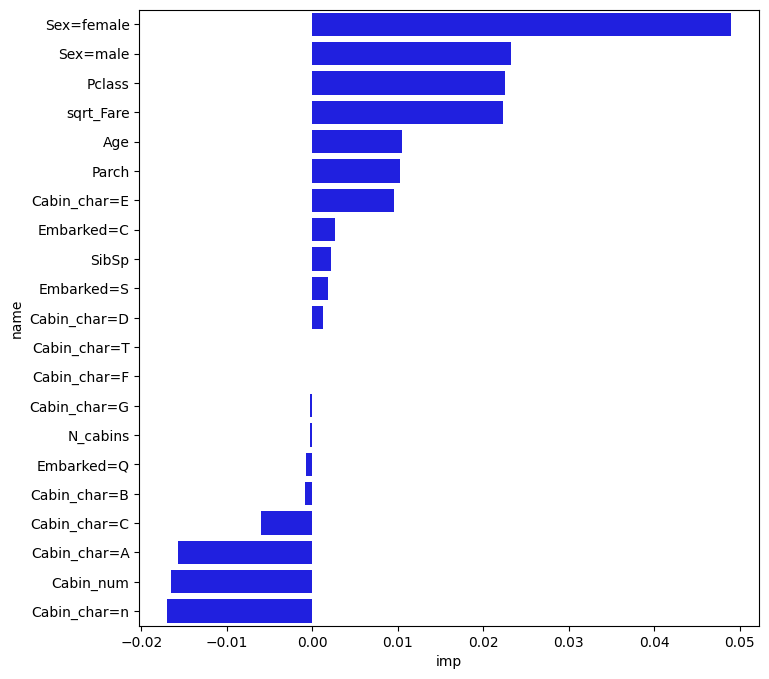

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.barplot(data=df, y="name", x="imp", color="blue", orient="h")
plt.show()

Ниже выполняются те же операции, но уже с линейной регрессией.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

r = permutation_importance(model, x_test, y_test, n_repeats=100, random_state=42)

df = pd.DataFrame({"name": x_train.columns, "imp": r.importances_mean}).sort_values(
    "imp", ascending=False
)
df

name       imp
5       Sex=male  0.111689
6     Sex=female  0.111689
0         Pclass  0.059201
1            Age  0.023061
4      sqrt_Fare  0.015694
20  Cabin_char=D  0.009864
2          SibSp  0.008806
16  Cabin_char=E  0.007650
13  Cabin_char=F  0.004585
8     Embarked=S  0.002909
10     Cabin_num  0.001179
19  Cabin_char=n  0.001033
3          Parch  0.000848
9     Embarked=Q  0.000727
17  Cabin_char=B  0.000485
15  Cabin_char=C  0.000005
12  Cabin_char=T  0.000000
7     Embarked=C -0.000649
18  Cabin_char=A -0.000721
11      N_cabins -0.003324
14  Cabin_char=G -0.005103

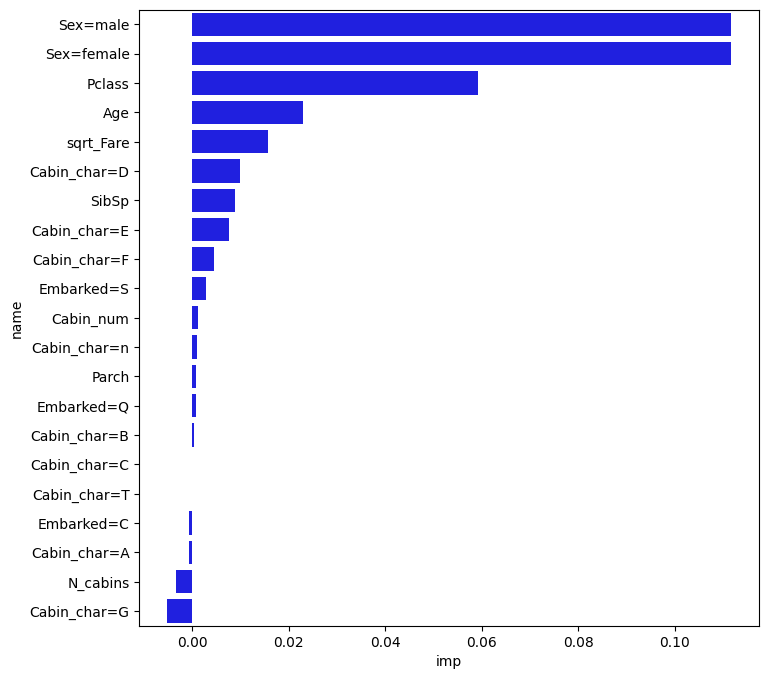

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(data=df, y="name", x="imp", color="blue", orient="h")
plt.show()

Как видно, у некоторых признаков при переходе от древесных моделей к линейным значительно повысилась важность, что говорит об их скоррелированности.

## Boruta

Boruta развивает идею Permutation.

Попробуем "раздуть" наш датасет, добавив в него "теневые признаки" $-$ перемешанные реальные. Таким образом, наш датасет точно будет содержать хорошие признаки (мы ничего не удаляем).

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/boruta_idea.png" alt="alttext" width="600"/>

После этого обучаем модель и отбираем те признаки, чей `feature_importance` больше, чем у лучшего из теневых. Успех? Не совсем, ведь перемешивание это случайный процесс. Надо повторить процедуру несколько раз для того чтобы удалить случайные скачки качества.

Таким образом, для каждого признака мы будем знать, сколько раз мы его отобрали. Получаем распределение. Самая большая неопределенность будет в середине (вероятность отобрать = 0.5):

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/boruta_diagram.png" alt="alttext" width="600"/>

[Automated feature selection with boruta](https://www.kaggle.com/code/residentmario/automated-feature-selection-with-boruta)

Набор (в нашем случае из 20) испытаний Бернулли это биномиальное распределение. Поступаем просто. Со значимостью, допустим 0.05, берем все из хорошего хвоста и отбрасываем из плохого хвоста. С признаками из середины колокола ничего особо не сделаешь, увеличение числа итераций приведет к ужатию колокола, но глобально не поможет.

Если нам нужна хорошо интерпретируемая модель, то надо брать только "точно хорошие" признаки. А если мы готовы поднабрать мусорных признаков, то можем отбросить только плохой хвост.


### Пример отбора признаков с помощью Boruta

Будем использовать реализацию github [boruta_py](https://github.com/scikit-learn-contrib/boruta_py). Возьмем Random Forest модель.

In [ ]:
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

Попробуем применить алгоритм Boruta к этому же датасету, и сократить количество признаков.
Оценим текущее качество модели, используя ROC-AUC

In [ ]:
pred = model.predict_proba(x_test)[:, 1]
r1 = roc_auc_score(y_score=pred, y_true=y_test)

print(f"ROC-AUC: {r1:.4f}")

ROC-AUC: 0.8894


Загрузим Boruta:

In [ ]:
!pip install -q boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 5.6 MB/s eta 0:00:00


Питоновская реализация Boruta соответствует  API sklearn и может использоваться как в конвейере, так и самостоятельно.


Boruta работает с `numpy.array`, поэтому используем `.values()` :

In [ ]:
print(type(x_train))
print(type(x_train.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


Проведем оценку признаков при помощи Boruta.



In [ ]:
from boruta import BorutaPy

# define Boruta feature selection method
model = RandomForestClassifier(n_estimators=500, random_state=42)


feat_selector = BorutaPy(model, n_estimators=100, verbose=2, random_state=42)

# find all relevant features
feat_selector.fit(x_train.values, y_train.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	17
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	17
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	17
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	17
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	18


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	18


BorutaPy(estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x7ABE867D0F40),
         n_estimators=100, random_state=RandomState(MT19937) at 0x7ABE867D0F40,
         verbose=2)

Выведем признаки с оценкой их важности и очистим датасет от маловажных признаков

In [ ]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(
    zip(x_train.columns, feat_selector.ranking_, feat_selector.support_)
)

# iterate through print out the results and remove features with low rank
for feat in feature_ranks:
    print("Feature: {:<25} Rank: {},  Keep: {}".format(feat[0], feat[1], feat[2]))
    if feat[2] == False:
        del x_train[feat[0]]

Feature: Pclass                    Rank: 3,  Keep: False
Feature: Age                       Rank: 2,  Keep: False
Feature: SibSp                     Rank: 5,  Keep: False
Feature: Parch                     Rank: 6,  Keep: False
Feature: sqrt_Fare                 Rank: 1,  Keep: True
Feature: Sex=male                  Rank: 1,  Keep: True
Feature: Sex=female                Rank: 1,  Keep: True
Feature: Embarked=C                Rank: 9,  Keep: False
Feature: Embarked=S                Rank: 8,  Keep: False
Feature: Embarked=Q                Rank: 11,  Keep: False
Feature: Cabin_num                 Rank: 4,  Keep: False
Feature: N_cabins                  Rank: 15,  Keep: False
Feature: Cabin_char=T              Rank: 19,  Keep: False
Feature: Cabin_char=F              Rank: 16,  Keep: False
Feature: Cabin_char=G              Rank: 18,  Keep: False
Feature: Cabin_char=C              Rank: 13,  Keep: False
Feature: Cabin_char=E              Rank: 11,  Keep: False
Feature: Cabin_char=B      

Boruta из 21 признака оставила нам только три: **sqrt_Fare , Sex=male , Sex=female**



In [ ]:
x_train

sqrt_Fare  Sex=male  Sex=female
331   5.338539         1           0
733   3.605551         1           0
382   2.815138         1           0
704   2.802535         1           0
813   5.592406         0           1
..         ...       ...         ...
106   2.765863         0           1
270   5.567764         1           0
860   3.756102         1           0
435  10.954451         0           1
102   8.791331         1           0

[712 rows x 3 columns]

Обучим алгоритм на признаках, отобранных Boruta.
Давайте проверим, можем ли мы добиться такого же результата, если проанализируем и уберем «лишние» данные?

In [ ]:
# Build the model with the random forest algorithm

model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(x_train, y_train)

pred = model.predict_proba(x_test[x_train.columns])[:, 1]
r1 = roc_auc_score(y_score=pred, y_true=y_test)

print(f"ROC-AUC: {r1:.4f}")

ROC-AUC: 0.8243


После удаления ~85% признаков качество упало на так сильно, как можно было бы ожидать.

## Dropped variable importance

Редко используемый метод, заключающийся в том, что мы просто выбрасываем переменную и смотрим, как упало качество по сравнению с "полной" моделью.

Это не очень хорошо как минимум потому, что многие гиперпараметры зависят от числа признаков $-$ модель будет работать хуже еще и поэтому. Опять же между признаками могут быть сложные взаимодействия.

## Отбор признаков — это тоже выбор гиперпарметров

Никогда не отбирайте признаки на том же наборе данных, на котором тестируетесь. Иначе получите завышенное качество вашей модели.

### Пример обучения на большом числе бесполезных признаков

Сгенерируем следующий датасет.

У нас есть по 500 пациентов, больных и здоровых.
Для каждого известно 100000 **случайных** бинарных признаков.
Что будет, если мы попросим нашу модель научиться отделять здоровых от больных?

In [ ]:
np.random.seed(42)


pat_cnt = 500  # patients
snv_count = 100000  # all features(binary)

genes = [f"SNP{ind}" for ind in range(snv_count)]  # features names

# Generate 2 data sets, healthy and diseased patients.
# Each data set is a binary vector of length `snv_count`,
# in other words a SNV count vector of length 100000.

genes = [f"SNP{ind}" for ind in range(snv_count)]
healthy = pd.DataFrame(
    np.random.choice([0, 1], size=(pat_cnt, snv_count)), columns=genes
)
# We add a `State` column, indicating whether it's healthy or diseased.
healthy["State"] = "H"
diseased = pd.DataFrame(
    np.random.choice([0, 1], size=(pat_cnt, snv_count)), columns=genes
)
diseased["State"] = "D"

patients = pd.concat([healthy, diseased], axis=0)

# We drop the State column to get a `x` and a `y` matrix.
x = patients.drop("State", axis=1)
y = patients["State"]

In [ ]:
x.head()

SNP0  SNP1  SNP2  SNP3  SNP4  SNP5  SNP6  SNP7  SNP8  SNP9  ...  SNP99990  \
0     0     1     0     0     0     1     0     0     0     1  ...         1   
1     0     1     1     1     1     1     0     0     0     1  ...         0   
2     1     1     1     0     0     0     1     1     0     1  ...         1   
3     0     1     1     1     1     1     1     1     1     1  ...         0   
4     1     0     1     1     0     1     1     1     0     1  ...         0   

   SNP99991  SNP99992  SNP99993  SNP99994  SNP99995  SNP99996  SNP99997  \
0         1         1         0         1         0         1         0   
1         1         1         0         1         1         0         1   
2         1         0         1         0         1         0         1   
3         0         0         1         1         1         0         1   
4         0         1         1         1         0         1         0   

   SNP99998  SNP99999  
0         1         1  
1         0         1  
2         1         1  
3         0         1  
4         1         1  

[5 rows x 100000 columns]

#### Без отбора признаков

In [ ]:
from sklearn.metrics import average_precision_score, accuracy_score

# 1. Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y == "D", test_size=0.3, random_state=42
)

# 2. Train a logistic regression model on the train set
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# 3. Predict the probabilities for train and test sets
# 4. Calculate ROCAUC and PRAUC scores for the prediction of train and test sets
# 5. Compare the performance of the model on train and test sets using the scores

y_train_pred = model.predict_proba(x_train)[:, 1]
train_rocauc = roc_auc_score(y_score=y_train_pred, y_true=y_train)
train_prauc = average_precision_score(y_score=y_train_pred, y_true=y_train)
train_accuracy = accuracy_score(y_pred=y_train_pred > 0.5, y_true=y_train)
print("Train quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy:  {train_accuracy:.02f}")
# Test
y_test_pred = model.predict_proba(x_test)[:, 1]
test_rocauc = roc_auc_score(y_score=y_test_pred, y_true=y_test)
test_prauc = average_precision_score(y_score=y_test_pred, y_true=y_test)
test_accuracy = accuracy_score(y_pred=y_test_pred > 0.5, y_true=y_test)
print("\nTest quality:")
print(f"ROCAUC : {test_rocauc:.02f}")
print(f"PRAUC : {test_prauc:.02f}")
print(f"Accuracy:  {test_accuracy:.02f}")

Train quality:
ROCAUC : 1.00
PRAUC : 1.00
Accuracy:  1.00

Test quality:
ROCAUC : 0.49
PRAUC : 0.52
Accuracy:  0.48


Модель идеально выучила данные обучения, но с тестом беда (как и должно быть)

#### С неправильной процедурой отбора признаков

Возьмем те признаки, для которых средняя разница для больных и здоровых максимальна. Заметьте, мы даже не используем чего-то сильно сложного.

In [ ]:
# 1. Take the mean of all the reads for each gene in healthy
#  and each gene in diesised.
# 2. Subtract the mean number of reads for each gene in diesised
# from the mean number of reads for each gene in healthy.

diffs = x[y == "H"].mean(axis=0) - x[y == "D"].mean(axis=0)
# 3. Look at the top k most different genes
# by sorting the values in the resulting array from largest to smallest.
top = np.abs(diffs).sort_values(ascending=False)[0:10]
genes = top.index

# Print the gene names of the top k genes.
print("Genes", genes)

# Select x
x_selected = x[genes]

Genes Index(['SNP3660', 'SNP54022', 'SNP96099', 'SNP77184', 'SNP71144', 'SNP70126',
       'SNP14768', 'SNP63912', 'SNP17706', 'SNP32249'],
      dtype='object')


И посмотрим на качество модели:

In [ ]:
# 1. Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x_selected, y == "D", test_size=0.3, random_state=42
)
# 2. Train a logistic regression model on the train set
model = LogisticRegression()
model.fit(x_train, y_train)

# 3. Predict the probabilities for train and test sets
# 4. Calculate ROCAUC and PRAUC scores for the prediction of train and test sets
# 5. Compare the performance of the model on train and test sets using the scores
y_train_pred = model.predict_proba(x_train)[:, 1]
train_rocauc = roc_auc_score(y_score=y_train_pred, y_true=y_train)
train_prauc = average_precision_score(y_score=y_train_pred, y_true=y_train)
train_accuracy = accuracy_score(y_pred=y_train_pred > 0.5, y_true=y_train)
print("Train quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: accuracy {train_accuracy:.02f}")
# Test
y_test_pred = model.predict_proba(x_test)[:, 1]
train_rocauc = roc_auc_score(y_score=y_test_pred, y_true=y_test)
train_prauc = average_precision_score(y_score=y_test_pred, y_true=y_test)
train_accuracy = accuracy_score(y_pred=y_test_pred > 0.5, y_true=y_test)
print("\nTest quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: accuracy {train_accuracy:.02f}")

Train quality:
ROCAUC : 0.72
PRAUC : 0.71
Accuracy: accuracy 0.67

Test quality:
ROCAUC : 0.72
PRAUC : 0.70
Accuracy: accuracy 0.65


Внезапно качество на тесте выглядит разумным. Да, не очень классное, но есть. А должно быть соответствующее случайной модели — признаки-то случайные.

Дело в том, что мы изначально выбрали те признаки, которые работали хорошо по случайным причинам на всем нашем искусственном датасете, а не только на тренировочной выборке.

#### С правильной процедурой отбора признаков




In [ ]:
# Split the data into train and test sets (with two sizes)
x_fs_train, x_test, y_fs_train, y_test = train_test_split(
    x, y == "D", test_size=0.3, random_state=42
)
# split again
x_fs, x_train, y_fs, y_train = train_test_split(
    x_fs_train, y_fs_train, test_size=0.8, random_state=42
)

Отбираем признаки на одном датасете

In [ ]:
# 1. Find the difference between the mean expression
#    of the genes
# 2. Sort the resulting list according to the difference in means
#    (from greatest difference to least)
# 3. Take the top K genes and return them

diffs = x_fs[np.logical_not(y_fs)].mean(axis=0) - x_fs[y_fs].mean(axis=0)
top = np.abs(diffs).sort_values(ascending=False)[0:10]
genes = top.index

Обучаем модель на втором

In [ ]:
model = LogisticRegression()
model.fit(x_train[genes], y_train)
y_train_pred = model.predict_proba(x_train[genes])[:, 1]

y_train_pred = model.predict_proba(x_train[genes])[:, 1]
train_rocauc = roc_auc_score(y_score=y_train_pred, y_true=y_train)
train_prauc = average_precision_score(y_score=y_train_pred, y_true=y_train)
train_accuracy = accuracy_score(y_pred=y_train_pred > 0.5, y_true=y_train)
print("Train quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: accuracy {train_accuracy:.02f}")

Train quality:
ROCAUC : 0.57
PRAUC : 0.56
Accuracy: accuracy 0.56


Тестируем на третьем

In [ ]:
y_test_pred = model.predict_proba(x_test[genes])[:, 1]
train_rocauc = roc_auc_score(y_score=y_test_pred, y_true=y_test)
train_prauc = average_precision_score(y_score=y_test_pred, y_true=y_test)
train_accuracy = accuracy_score(y_pred=y_test_pred > 0.5, y_true=y_test)
print("Test quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: {train_accuracy:.02f}")

Test quality:
ROCAUC : 0.52
PRAUC : 0.50
Accuracy: 0.52


# Задача понижения размерности


Часто мы хотим данные из пространства высокой размерности преобразовать в пространство более низкой размености с сохранением одного или нескольких свойств, например:
* объекты реконструируются обратно почти без ошибки,
* расстояние между объектами сохраняется.


Зачем это нужно? По многим причинам:

1. Многие алгоритмы показывают себя плохо на пространствах большой размерности в принципе ([проклятие размерности](https://en.wikipedia.org/wiki/Curse_of_dimensionality)).

2. Некоторые просто будут значительно дольше работать, при этом качество их работы не изменится от уменьшения размерности.

3. Понижение размерности позволяет использовать память более эффективно и подавать модели на обучение за один раз больше объектов.

4. Избавиться от шумовых признаков, обсудим это дальше.

5. Задача визуализации: хочется взглянуть на наши объекты, а делать это в 100-мерном или 100000-мерном пространстве невозможно.

6. Удаление выбросов — в пространствах меньшей размерности можем их увидеть глазами.

7. Можем увидеть закономерности в данных: что они бьются на явные кластеры и т. д.



## Manifold assumption

В машинном обучении часто используют предположение о многообразии (manifold assumption). Это предположение о том, что между признаками, описывающими реальные объекты, существуют некоторые нетривиальные связи. Вследствие этого данные заполняют не весь объем пространства признаков, а лежат на некоторой поверхности — на **многообразии** (manifold).

Если предположение верно, то каждый объект может быть достаточно точно описан новыми признаками в пространстве значительно меньшей размерности, чем исходное пространство признаков.

При этом мы будем терять часть информации об объектах. Но при выполнении предположения о многообразии (а оно почти всегда выполняется) и при правильных настройках алгоритма понижения размерности эти потери будут незначительны.

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/manifold_assumption.png" width="600">

В большинстве случаев это действительно правда. Например, лица людей даже на фотографиях 300x300, очевидно, лежат в пространстве меньшей размерности, нежели 90000. Ведь не каждая матрица 300 на 300, заполненная какими-то значениями от 0 до 1, даст нам изображение человека.

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/faces_in_space_of_smaller_dimension.png" width="600">

## PCA (Метод главных компонент)

Метод главных компонент (Principal Component Analysys, PCA) — простейший линейный метод снижения размерности, описан [Пирсоном в 1901 году](http://pca.narod.ru/pearson1901.pdf).



Идея заключается в преобразовании $D$ исходных признаков таким образом, чтобы получить $d$ признаков, содержащих как можно больше информации из исходных признаков:

$$\large z_{ij} = \sum^D_{k=1}w_{jk}x_{ik},$$

где: $\; z_{ij}$ — новые признаки ($d$ штук),

$\qquad x_{ik}$ — исходные признаки ($D$ штук),

$\qquad w_{jk}$ — вклад исходного $k$-го признака в новый $j$-й.

Запишем линейное преобразование исходного признакового пространства в **матричном виде**.

Требование — ортогональность матрицы $W: W^TW = I$, где $I$ — единичная матрица.

Получение новых признаков $Z$ осуществляется домножением исходных признаков $X$ на матрицу $W: XW=Z$.

Следовательно, $X=ZW^T$

Задача: $\displaystyle ||X-ZW^T||^2 \rightarrow \min_{W}$

$$$$

#### Максимизация дисперсии выборки после понижения размерности

Рассмотрим простой пример для понимания интуиции, которая стоит за методом главных компонент.

У нас есть выборка объектов с двумя признаками $x_1$ и $x_2$, отобразим их на плоскости. Мы хотим, чтобы у нас был только один признак, который характеризует наши данные. Тогда наша задача — провести прямую через наши точки так, чтобы она наилучшим образом характеризовала наши данные

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/pca_dataset_example.png" width="400"/>

Проведем прямую вдоль максимального изменения данных и спроецируем точки на нее. Это и будет наша первая главная компонента.

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/first_component_example.png" width="400"/>

Теперь мы можем использовать только один признак, который лежит на новой оси, а любые отклонения от нее это просто шум (в действительности, определить, что является шумом в данных это нетривиальная задача).

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/proection_component.png" width="400"/>

Это то, как можно понимать интуицию работы PCA.

В более многомерном случае (например, при количестве признаков 200) мы бы делали то же самое:

1. Выбираем направление максимального изменения данных — это первая главная компонента.
2. Если данные описаны не полностью, то выбираем еще одно направление — перпендикулярное к первому, так, чтобы описать оставшееся изменение в данных.
3. Повторяем пункт 2, пока компонент не будет достаточно, вплоть до размерности исходного пространства. При этом каждая следующая компонента будет перпендикулярна предыдущим и объяснять меньше дисперсии, чем любая из них.

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/3d_to_2d_pca.png" width="1000"/>

### Пример с Титаником

Чтобы понять, как использовать PCA на практике, найдем главные компоненты для датасета Titanic и посмотрим, как распределится между ними дисперсия.

In [ ]:
import pandas as pd
import numpy as np


# The categorical-to-numerical function
# Changed to automatically add column names
def cat_to_num(data):  # one-hot encoding
    categories = set(data)
    features = {}
    for cat in categories:
        binary = data == cat
        if len(set(binary)) == 1:
            # Ignore features where all values equal
            continue
        new_key = f"{data.name}={cat}"

        features[new_key] = binary.astype("int")
    return pd.DataFrame(features)


def cabin_features(data):
    features = []
    for cabin in data:
        cabins = str(cabin).split(" ")
        n_cabins = len(cabins)
        # First char is the cabin_char
        try:
            cabin_char = cabins[0][0]
        except IndexError:
            cabin_char = "X"
            n_cabins = 0
        # The rest is the cabin number
        try:
            cabin_num = int(cabins[0][1:])
        except:
            cabin_num = -1
        # Add 3 features for each passanger
        features.append([cabin_char, cabin_num, n_cabins])
    features = np.array(features)
    dic_of_features = {
        "Cabin_num": features[:, 1].astype("int"),
        "N_cabins": features[:, 2].astype("int"),
    }
    out = pd.DataFrame(dic_of_features)
    char_column = pd.DataFrame({"Cabin_char": features[:, 0]})
    cabin_ch = cat_to_num(char_column["Cabin_char"])
    return out.join(cabin_ch)


def prepare_data(data):
    """Takes a dataframe of raw data and returns ML model features"""

    # Initially, we build a model only on the available numerical values
    features = data.drop(
        [
            "PassengerId",
            "Survived",
            "Fare",
            "Name",
            "Sex",
            "Ticket",
            "Cabin",
            "Embarked",
        ],
        axis=1,
    )

    # Setting missing age values to -1
    features["Age"] = data["Age"].fillna(-1)

    # Adding the sqrt of the fare feature
    features["sqrt_Fare"] = np.sqrt(data["Fare"])

    # Adding gender categorical value
    features = features.join(cat_to_num(data["Sex"]))

    # Adding Embarked categorical value
    features = features.join(cat_to_num(data["Embarked"]))

    # Split cabin
    features = features.join(cabin_features(data["Cabin"]))

    return features

##### Без стандартизации

Загрузим датасет и подготовим данные

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Importing the data from the .csv
# 2. Pre-processing the data and creating a feature set
# 3. Splitting the data into training and test data and labels

dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/titanic.csv"
)
features = prepare_data(dataset)
x_train, x_test, y_train, y_test = train_test_split(
    features, dataset["Survived"], test_size=0.2, random_state=42
)

Полезной информацией является коэффициент объясненной дисперсии (explained variance ratio) главной компоненты. Этот коэффициент является отношением между дисперсией главной компоненты и суммой дисперсий всех главных компонент. Он указывает долю выборочной дисперсии, которая лежит вдоль оси каждой главной компоненты.

В модуле PCA, после `fit` можно получить explained variance ratio посредством обращения к полю `explained_variance_ratio_`, а explained variance — посредством обращения к полю `explained_variance_`.



Построим график с `explained_variance_ratio_` всех компонент

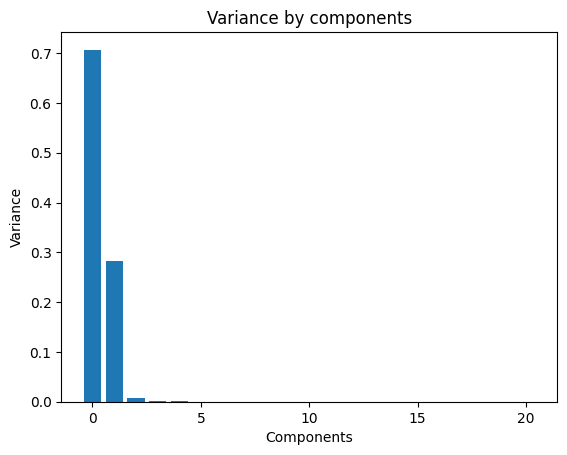

In [ ]:
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# performing PCA with default number of principal components.
titanic_pca = sklearn.decomposition.PCA()
titanic_pca.fit(x_train)  # fitting our PCA model with the training data.
# calculating the explained variance of each of the components.
evr = titanic_pca.explained_variance_ratio_

# We are plotting the explained variance ratios.
plt.bar(range(evr.shape[0]), evr)
plt.title("Variance by components")
plt.xlabel("Components")
plt.ylabel("Variance")
plt.show()

In [ ]:
titanic_pca.explained_variance_.shape

(21,)

Из графика не совсем понятно, сколько компонент брать, резко доля объясняемой дисперсии меняется в районе 2-компоненты. Посмотрим, сколько компонент нужно модели

In [ ]:
from sklearn.linear_model import LogisticRegression

# 1.The first thing we do is to fit a PCA model to the training set
#   of the Titanic dataset with n components from 1 to 10.
# 2.We then fit a logistic regression model to the transformed training data
#   and make predictions on the transformed test set.

for i in range(1, 11):
    titanic_pca = sklearn.decomposition.PCA(n_components=i)
    titanic_pca.fit(x_train)

    x_train_reduced = titanic_pca.transform(x_train)
    model = LogisticRegression(max_iter=1000)
    model.fit(x_train_reduced, y_train)

    x_test_reduced = titanic_pca.transform(x_test)

    # prints the number of PCA components and the score
    # for the corresponding model.
    print("%i first components %.2f" % (i, model.score(x_test_reduced, y_test)))

1 first components 0.61
2 first components 0.62
3 first components 0.68
4 first components 0.68
5 first components 0.75
6 first components 0.78
7 first components 0.78
8 first components 0.79
9 first components 0.79
10 first components 0.79


Явно видим, что уже первых 7 компонент достаточно для достижения качества, которое далее не меняется. Почему же мы видим снижение уже после 2 компоненты?


Мы забыли сделать **стандартизацию** наших данных.

В нашем датасете переменные имеют совершенно разные масштабы. Из-за этого часть из них "перетегягивает" на себя всю дисперсию.

В результате по доле дисперсии судить о важности компонент нельзя.

##### Со стандартизацией

Сделаем предварительно стандартизацию

In [ ]:
# First, we import the StandardScaler module.
from sklearn.preprocessing import StandardScaler

# Next, we create a StandardScaler object called scaler by calling the
# StandardScaler() function.
scaler = StandardScaler()

#  We then fit the scaling model to our training data.
x_train = scaler.fit_transform(x_train)

# We transform your test set by applying the same scaling model.
x_test = scaler.transform(x_test)

# performing PCA with default number of principal components.
titanic_pca = sklearn.decomposition.PCA()
titanic_pca.fit(x_train)  # fitting our PCA model with the training data.

PCA()


В `PCA.components_` лежат вектора главных компонент, которые располагаются там построчно (n_components, n_features).

In [ ]:
titanic_pca.components_.shape

(21, 21)

Обратите внимание, что PCA упорядочивает собственные вектора. Это значит, что собственный вектор, соответствующий главной компоненте и, соответственно, имеющей максимальную дисперсию, будет находиться в первой строке.

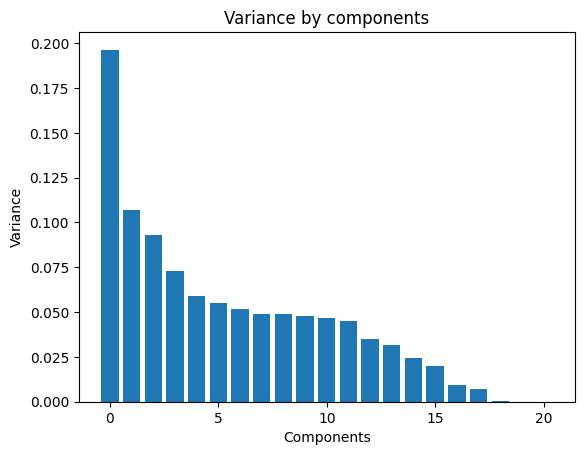

In [ ]:
# calculating the explained variance of each of the components.
evr = titanic_pca.explained_variance_ratio_

# We are plotting the explained variance ratios.
plt.bar(range(evr.shape[0]), evr)
plt.title("Variance by components")
plt.xlabel("Components")
plt.ylabel("Variance")
plt.show()

Теперь видим, что не только первые две компоненты дают вклад. Это происходит потому, что переменные с большим диапазоном значений не забивают остальные.

Правда, теперь и значимого спада в доле объясняемой дисперсии мы долго не видим, поэтому встает вопрос: как выбрать число компонент так, чтобы взять нужное и отсечь ненужное?

### Как выбирать оптимальное число  компонент




Скачаем датасет, на котором польза от понижения размерности видна более явно.

В данном датасете хранятся признаки (нам сейчас не важно, какие), характеризующие примерно 8000 клеток крови.



In [ ]:
# 1. Reading in the scRNAseq data.
scRNAseq = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/scRNAseq_CITEseq.txt",
    sep="\t",
)

x_scRNAseq = scRNAseq.iloc[:, 0:-1]  # features
y_scRNAseq = scRNAseq.iloc[:, -1]  # labels

# 2. taking the log of the data.
x_scRNAseq = np.log(x_scRNAseq + 1)
print(f"dataset shape: {scRNAseq.shape}")

dataset shape: (8617, 977)


Подбирать число компонент можно по-разному

#### По доле объясняемой дисперсии

Часто берут минимальное число компонент, которое объясняет 95% дисперсии. Подход, очевидно, порочный (а почему не 90% или 99%), зато быстрый.

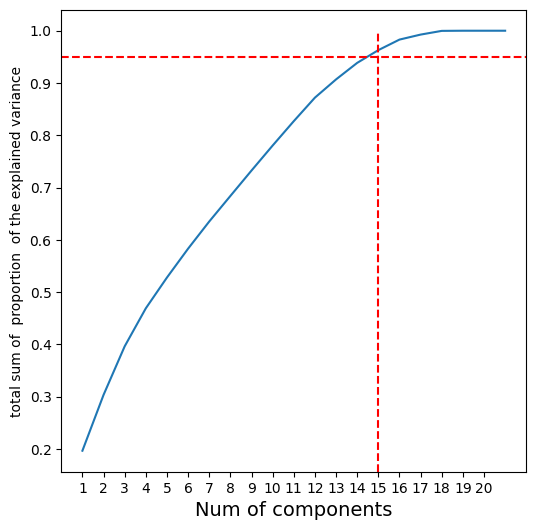

In [ ]:
# 1. We're calculating the explained variance ratio for
#    each component of the PCA.
# 2. We're plotting these ratios in a chart.

pca = PCA(n_components=x_train.shape[1])
pca.fit(x_train)

ths = 0.95
total_explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6, 6))

plt.plot(np.arange(1, total_explained.shape[0] + 1), total_explained)
plt.axhline(xmin=0, xmax=1000, y=ths, c="red", ls="--")
chosen_number = np.where(total_explained >= 0.95)[0][0] + 1
plt.axvline(x=chosen_number, ymin=0, ymax=ths, c="red", ls="--")
plt.xticks(np.arange(1, x_train.shape[1]))
plt.ylabel("total sum of  proportion  of the explained variance")
plt.xlabel("Num of components", size=14)

plt.show()

Взяли 15 компонент. Почему именно столько? Почему не 16?

Непонятно. Просто, ибо поставили такой порог. Могли поставить и другой, и тогда бы взяли больше или меньше компонент.


#### По правилу локтя

Можно построить график, отражающий, сколько дисперсии объясняет каждая из компонент, и на основе графика выбрать нужное число компонент.

Идея подхода простая: переход от компонент, объясняющих что-то важное в данных, к компонентам, объясняющим шум, должен сопровождаться резким снижением доли объясняемой дисперсии.

Или можно сказать иначе: выбранные нами компоненты должны быть устойчивы к добавлению шума в данные. Если мы нашли резкий скачок в доле объясняемой дисперсии, то маловероятно, что добавление шума этот скачок нивелирует — наш способ отбора компонент устойчив к шуму.

В идеальном случае график будет выглядеть как-то так. Но на практике таких склонов может не быть, а может быть несколько.

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/elbow_rule.png" width="600">

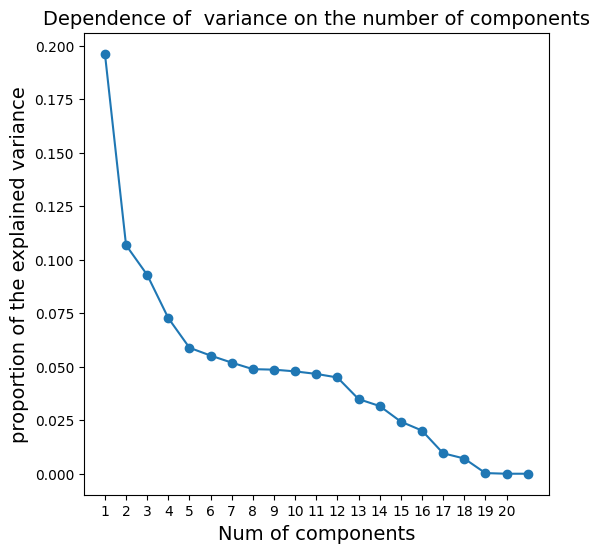

In [ ]:
# 1. First, we create a PCA object that you fit to the training data.
# 2. Then, we create a a scatter plot where we plot the explained
#    variance ratio as a function of the number of PCA components.
# 3. We also plot the explained variance ratio as a function of the
#    number of components, but with a smooth curve.
# 4. Finally, we show the plot.

n_comp = x_train.shape[1]

explained = pca.explained_variance_ratio_

plt.figure(figsize=(6, 6))
plt.scatter(np.arange(1, n_comp + 1), explained)
plt.plot(np.arange(1, n_comp + 1), explained)
plt.title("Dependence of  variance on the number of components", size=14)
plt.xlabel("Num of components", size=14)
plt.ylabel("proportion of the explained variance", size=14)
plt.xticks(np.arange(1, x_train.shape[1]))
plt.show()

Понять, какое число компонент стоит выбрать, из такого графика сложно. Наверно, стоит выбрать последний склон — в нашем случае мы возьмем первые 12 компонент.



Можно применить критерий локтя и к нашему изначальному графику с суммарной долей объясненной дисперсии (в таком случае ожидаем скачок). Но там скачок также трудно обнаружить.

#### Перестановочный метод

Еще одним способом выбрать число главных компонент является перестановочный метод. Он заключается в следующем:

 1) Перемешиваем значения каждого признака.

 2)  Получаем матрицу признаков, которая не содержит никакой информации об исходном многообразии.

 3) Делаем PCA.

 4) Любая explained variance — просто из-за природы данных.

 5) Делаем так 100-1000 раз.

 6) Пусть на реальных данных k-я компонента объясняет
n% дисперсии.

 7) Смотрим на распределение доли дисперсии,
объясняемой k-компонентой для случайных данных
(полученных перемешиванием).

 8) Можем сравнить и принять решение, объясняет ли k-я
компонента что-то реальное или является просто шумом.

In [ ]:
from tqdm import tqdm
from scipy.stats import norm


def shuffle_dataset(dataset):
    random_data = {}
    for col in dataset.columns:
        random_data[col] = np.random.permutation(dataset.loc[:, col].values)
    random_data = pd.DataFrame(random_data)
    return random_data


def get_variance_by_chance(dataset, n_replics, n_components):
    variance_explained_by_chance = np.zeros((n_replics, n_components))
    for i in tqdm(range(n_replics)):
        random_data = shuffle_dataset(dataset)
        random_pca = PCA(n_components=n_components)
        random_pca.fit(random_data)
        variance_explained_by_chance[i, :] = random_pca.explained_variance_ratio_
    return variance_explained_by_chance


def get_pc_variance(dataset, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(dataset)
    return pca.explained_variance_ratio_


def plot_mean_and_CI(
    ax,
    values,
    label,
    ci_level=0.95,
    alpha_transparency=0.5,
    color_mean=None,
    color_shading=None,
):
    mean = values.mean(axis=0)

    std = values.std(axis=0)
    n = values.shape[1]
    se = std / np.sqrt(n)

    q_alpha = (1 - ci_level) / 2
    ci_num = np.abs(norm.ppf(q_alpha, loc=0, scale=1))

    lb = mean - ci_num * se
    ub = mean + ci_num * se

    # plot the shaded range of the confidence intervals
    ax.fill_between(
        range(mean.shape[0]), ub, lb, color=color_shading, alpha=alpha_transparency
    )
    # plot the mean on top
    ax.plot(mean, c=color_mean, lw=3, label=label)


def plot_explained_variance(ax, variance):
    ax.plot(variance, label="real", lw=3)
    ax.scatter(np.arange(0, variance.shape[0]), variance)


def plot_variance_by_change(ax, variance_by_chance):
    plot_mean_and_CI(
        ax, variance_by_chance, label="chance", color_mean="red", color_shading="red"
    )


def calc_permutat_pval(real_values, permut_values, eps=None):
    eps = eps or (1 / (permut_values.shape[0] * 10))

    p_values = np.zeros_like(real_values)
    for i in range(0, p_values.shape[0], 1):
        p_values[i] = (permut_values[:, i] >= real_values[i]).mean() + eps
    return p_values


def plot_explained_vs_chance(
    ax, explained_variance, variance_by_chance, dataset_name, step=1
):
    plot_explained_variance(ax, explained_variance)
    plot_variance_by_change(ax, variance_by_chance)

    ax.set_title(f"PCA {dataset_name}", size=25)
    ax.set_xlabel("Component number", size=15)
    ax.set_ylabel("Explained variance ration", size=15)
    ax.set_xticks(np.arange(0, explained_variance.shape[0], step))
    ax.set_xticklabels(np.arange(1, explained_variance.shape[0] + 1, step), size=10)

    ax.tick_params(labelsize=10, size=8)
    ax.set_ylim(0, explained_variance[0] + 0.1)
    ax.legend(fontsize=15)


def plot_pval_plot(ax, p_values, dataset_name, alpha_level=0.05, logscale=True, step=1):
    if logscale:
        p_values = -np.log10(p_values)
        alpha_level = -np.log10(alpha_level)

    ax.set_title(f"PC significance, {dataset_name}", size=25)
    ax.plot(p_values, lw=3)
    ax.scatter(np.arange(0, p_values.shape[0]), p_values, lw=3)

    ax.set_xlabel("Component number", size=15)
    ax.set_ylabel("-log(pvalue + eps)", size=15)
    ax.set_xticks(np.arange(0, p_values.shape[0], step))

    ax.set_xticklabels(labels=np.arange(1, p_values.shape[0] + 1, step), size=10)
    ax.tick_params(labelsize=10, size=8)

    ax.hlines(
        y=alpha_level,
        xmin=0,
        xmax=p_values.shape[0],
        color="red",
        linestyles="dashed",
        lw=3,
    )


def pca_analysis(ax1, ax2, dataset, title, n_components=None, n_replics=1000, step=1):
    n_components = n_components or dataset.shape[1]
    explained_variance = get_pc_variance(dataset, n_components)
    variance_by_chance = get_variance_by_chance(dataset, n_replics, n_components)
    p_values = calc_permutat_pval(explained_variance, variance_by_chance)
    plot_explained_vs_chance(ax1, explained_variance, variance_by_chance, title)
    plot_pval_plot(ax2, p_values, title)

100%|██████████| 10/10 [00:00<00:00, 114.46it/s]


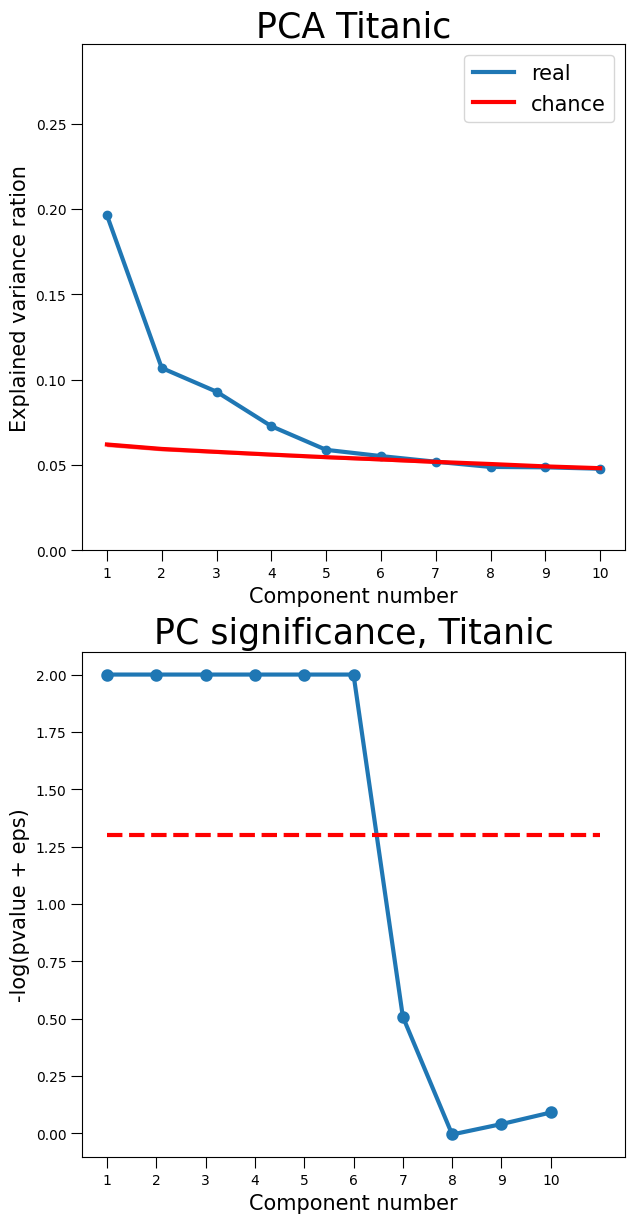

In [ ]:
np.random.seed(42)
f, (ax1, ax2) = plt.subplots(2, 1)
f.set_figheight(7)
f.set_figwidth(7)
plt.subplots_adjust(top=1.7)
pca_analysis(ax1, ax2, pd.DataFrame(x_train), "Titanic", n_replics=10, n_components=10)

Явно видим, что, согласно этому подходу, надо взять 6 компонент.

### Вклад исходных признаков в компоненты

Мы можем также посмотреть, какие признаки внесли вклад в компоненты

In [ ]:
first_component = titanic_pca.components_[0]

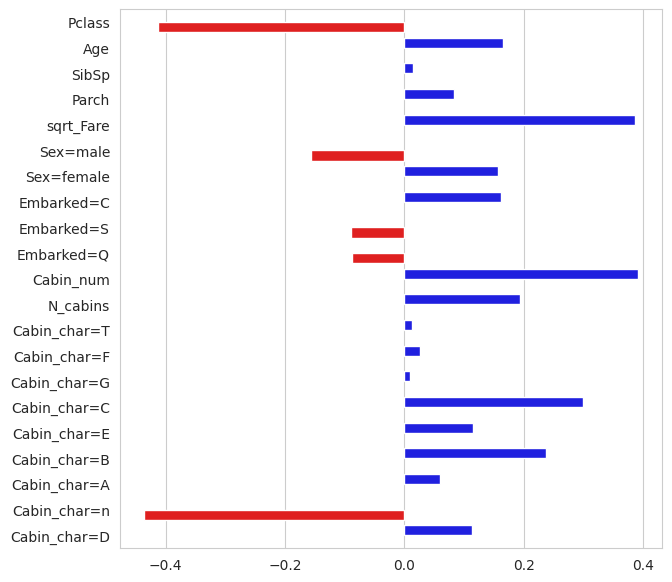

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(7, 7))

b = sns.barplot(
    x=first_component,
    y=features.columns,
    orient="h",
    hue=[z < 0 for z in first_component],
    palette=["blue", "red"],
)
b.legend_.remove()
plt.show()

Или абсолютные вклады

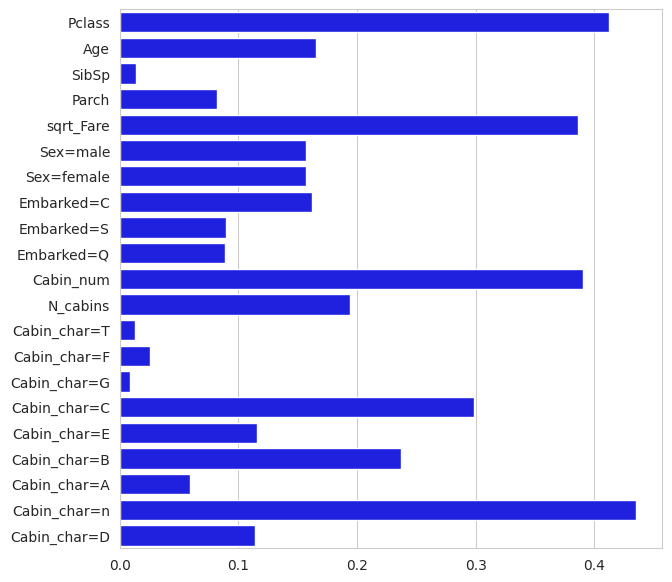

In [ ]:
plt.figure(figsize=(7, 7))

sns.barplot(x=np.abs(first_component), y=features.columns, orient="h", color="blue")
plt.show()

Видим, что наибольший вклад в дисперсию вносят такие признаки, как класс пассажира и класс кабины.

### Важность стандартизации



Сгенерируем абсолютно случайную выборку, в которой нет никакой внутренней структуры.

Но пусть у нас 5 признаков, описывающих выборку, пришли из стандартного нормально распределения, а еще один будет равновероятно принимать значение 0 и 3.

In [ ]:
# 1. Generate x with N rows and P columns using the normal distribution.
# 2. Make a new vector with a third element that's either 0 or 3.
# 3. Append this vector to x, so that we now have a Nxp matrix.

np.random.seed(seed=42)
N = 200
P = 5

x = np.random.normal(size=[N, P])
print("x before", x.shape)
x = np.append(x, np.random.choice([0, 3], size=[N, 1]), axis=1)
print("x after", x.shape)

x before (200, 5)
x after (200, 6)


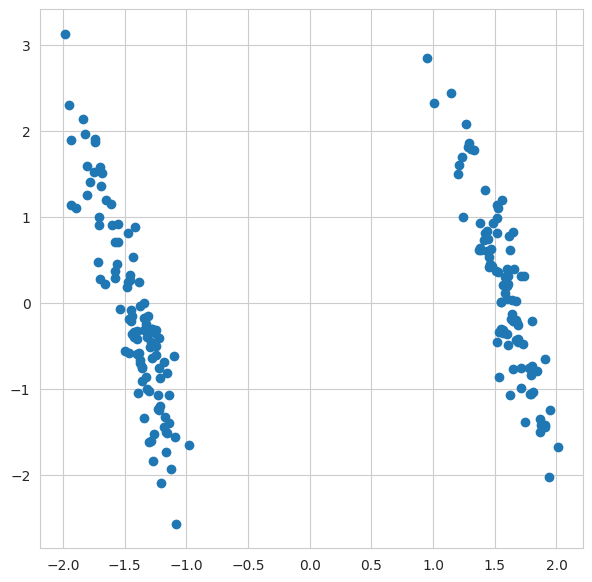

In [ ]:
# 1. Fitting PCA to the data, and reducing it to 2 components
# 2. Transforming that data using the PCA to get the low-dimensional representation
# 3. Plotting it with matplotlib

pca = PCA(2)
low_d = pca.fit_transform(x)
plt.figure(figsize=(7, 7))
plt.scatter(low_d[:, 0], low_d[:, 1])
plt.show()

Без предварительной нормализации мы получили два явных кластера в данных. Только вот кластеров этих по идее быть не должно

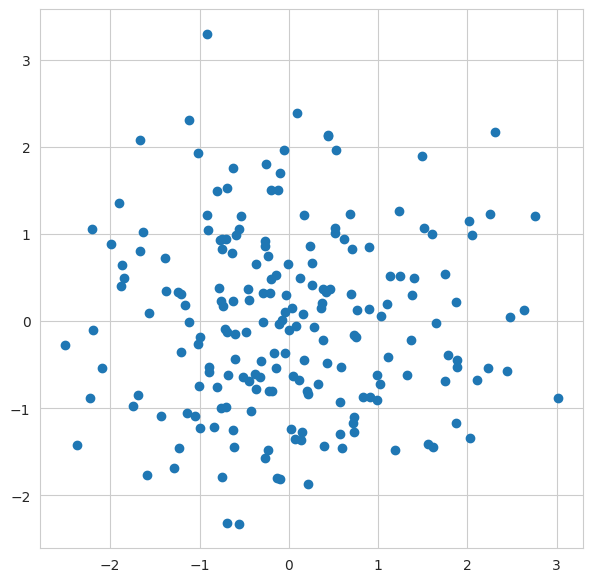

In [ ]:
# 1. Normalize the data
# 2. Take the output from the PCA function and assign it to our variable low_d
# 3. Plot the first two components of low_d as a scatter plot.

x_scaled = StandardScaler().fit_transform(x)
low_d = pca.fit_transform(x_scaled)
plt.figure(figsize=(7, 7))
plt.scatter(low_d[:, 0], low_d[:, 1])
plt.show()

После стандартизации кластеры исчезли. Поэтому у вас должны быть весомые аргументы для того, чтобы не применять стандартизацию или другой метод, переводящий ваши данные в одну шкалу со средним 0, перед применением PCA

### Пример с RNA-Seq — нахождение выбросов

Загрузим данные биологического анализа пациентов с раком и без него.

В данном случае наши данные уже предварительно обработаны, поэтому стандартизацию проводить не будем

In [ ]:
# 1. First we import the pandas Python package.
# 2. Then we read in the file that contains the RNA-seq data.
#    The RNA-seq data is stored in a tab-delimited file (.tab extension),
#    which is why we use the read_table pandas method.
#    The read_table method is named this way because
#    it reads tab-delimited data by default.
#    We want to tell the read_table method that the data is tab delimited,
#    that is why we supply the '\t' argument.
# 3. We want to tell the read_table method that the first column
#    contains our sample IDs, which is the column with index 0.
#    We do this by telling it to use the index_col argument and
#    setting that equal to 0.
# 4. We don't actually need the header information in this specific file,
#    so we don't have to tell pandas to parse the header information.
# 5. We assign the RNA-seq data to an object named rnadata

rnadataset = pd.read_table(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/rnaseq_data.tab.txt",
    index_col=0,
    header=None,
)
print("dataset shape: ", rnadataset.shape)

dataset shape:  (358, 71586)


In [ ]:
rnadataset.columns = list(rnadataset.columns[:-2]) + ["dataset", "sample type"]
rnadataset.head()

1         2          3         4         5         6  \
0                                                                          
GSM1296956  13.374975  3.536581  13.644486  3.929925  5.485977  9.363128   
GSM1296957  13.555346  4.772572  14.153843  4.388201  5.412374  9.339831   
GSM1296958  13.396705  4.804828  13.948490  4.395992  5.627752  7.867446   
GSM1296959  13.843843  4.563550  14.390648  4.697154  5.511075  8.943584   
GSM1296960  13.505687  4.750858  14.049400  4.476174  5.753380  8.475744   

                    7         8          9         10  ...      71577  \
0                                                      ...              
GSM1296956  13.134106  4.318162  10.050190  10.605277  ...  11.111910   
GSM1296957  13.789576  4.211175  11.242888  10.518348  ...  10.998240   
GSM1296958  13.424588  4.097212  10.568927  10.666406  ...  10.498048   
GSM1296959  14.181927  4.766994  10.418466  10.924152  ...  10.680012   
GSM1296960  14.255647  4.344796  10.189663  10.651861  ...   9.778142   

               71578      71579     71580      71581     71582     71583  \
0                                                                          
GSM1296956  6.889096  10.636753  6.656603  11.054070  6.914937  8.949687   
GSM1296957  8.220715  10.645032  5.799432  10.951782  5.358962  8.951818   
GSM1296958  8.145627  11.452488  6.164146  11.492929  6.189310  9.091511   
GSM1296959  8.450327  10.966135  6.482977  10.869259  6.683605  9.321499   
GSM1296960  7.615217  10.570247  5.861632  11.168351  6.343246  8.793520   

                71584   dataset  sample type  
0                                             
GSM1296956   8.982860  GSE53622       cancer  
GSM1296957   8.147058  GSE53622       normal  
GSM1296958  10.021106  GSE53622       cancer  
GSM1296959   9.278717  GSE53622       normal  
GSM1296960  11.562505  GSE53622       cancer  

[5 rows x 71586 columns]

In [ ]:
# We remove the dataset and sample type columns from the data frame and
# store the data frame in X
x = rnadataset.drop(labels=["dataset", "sample type"], axis=1)

# We store the dataset and sample type columns in the labels data frame
labels = rnadataset.loc[:, ["dataset", "sample type"]]

In [ ]:
# Finding the top two principal components of the data
pca_decomposer = PCA(n_components=2)
pca_decomposer.fit(x)

PCA(n_components=2)

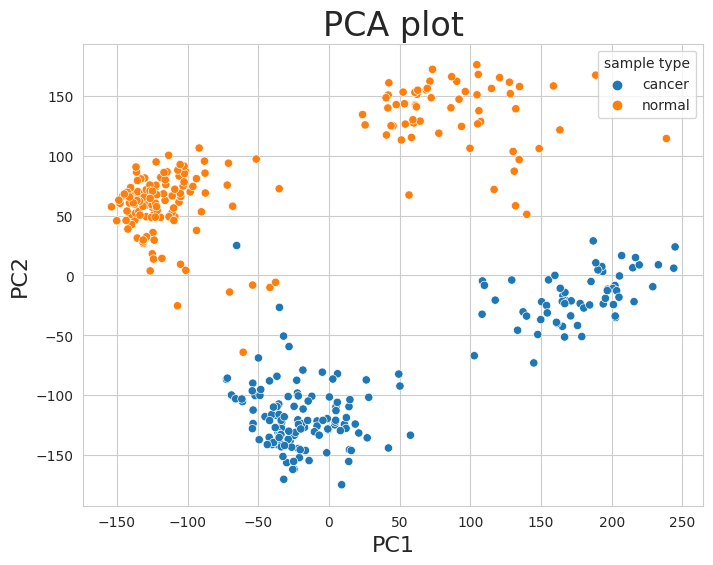

In [ ]:
# Run PCA on the features
x_reduced = pca_decomposer.transform(x)

# Display a scatterplot of the transformed dataset
plt.figure(figsize=(8, 6))
plt.title("PCA plot", size=24)
plt.xlabel("PC1", size=16)
plt.ylabel("PC2", size=16)
sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=labels["sample type"]);

Даже не понимая, что за признаки у нас в колонках, мы видим несколько интересных вещей.

Во-первых, синяя точка на оранжевой территории и оранжевая на синей — видимо, выбросы.

Кроме этого мы видим, что почему-то у нас есть 4 почти равноудаленных кластера, по два на рак и нормальную ткань

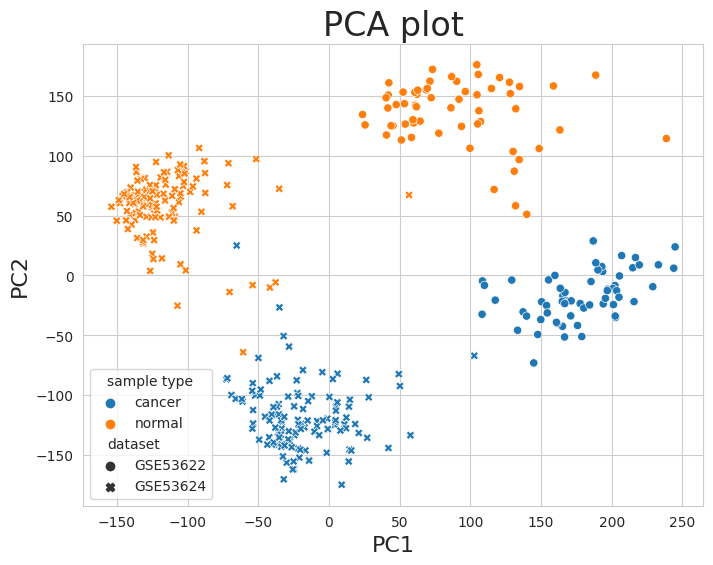

In [ ]:
# Run PCA on the features
x_reduced = pca_decomposer.transform(x)

# Display a scatterplot of the transformed dataset
plt.figure(figsize=(8, 6))
plt.title("PCA plot", size=24)
plt.xlabel("PC1", size=16)
plt.ylabel("PC2", size=16)
sns.scatterplot(
    x=x_reduced[:, 0],
    y=x_reduced[:, 1],
    hue=labels["sample type"],
    style=labels["dataset"],
);

Видим, что в пределах данных одного эксперимента рак и опухоль разделяются хорошо. Но при этом данные между разными экспериментами отличаются так же, как и рак от опухоли.

Этот эффект называется батч-эффектом и говорит о том, что нужно нормализовывать данные в пределах эксперимента каким-то хитрым образом, чтобы научить модель на новых данных отличать рак от нормальной ткани.

Таким образом, с помощью PCA мы нашли выбросы и артефакт в данных.

### Пример с лицами

Рассмотрим, как PCA применялся для решения практической задачи распознавания лиц*.

Датасет:
[Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)


\* Сейчас для этого используются более эффективные алгоритмы, использующие CNN.

Загрузим датасет и распакуем его на диск VM Colab

In [ ]:
# http://conradsanderson.id.au/lfwcrop/ (LFWcrop Face Dataset, greyscale version)
# 1. Downloading the LFWcrop dataset from the website.
# 2. Unzipping the dataset from the downloaded file.
# 3. Opening the directory with the faces.

dir = "lfwcrop_grey/faces"

# http://conradsanderson.id.au/lfwcrop/ (LFWcrop Face Dataset, greyscale version)
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/lfwcrop_grey.zip
!unzip -q lfwcrop_grey.zip

(64, 64)


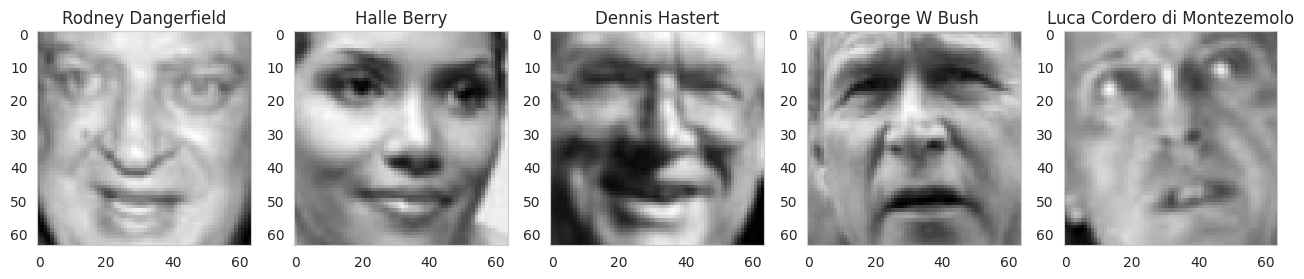

In [ ]:
import os

plt.rcParams["axes.grid"] = False


def show_faces(imgs, titles, h=64, w=64):
    plt.figure(figsize=(16, 4))
    for i in range(min(imgs.shape[0], 5)):
        plt.subplot(1, 5, i + 1)
        plt.imshow(imgs[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])


# Get first 1000 files
celebrity_photos = os.listdir(dir)[1:1001]
celebrity_imgs = [dir + "/" + photo for photo in celebrity_photos]
# Load images from disk
imgs = np.array([plt.imread(img) for img in celebrity_imgs], dtype=np.float64)
# Extract real celebrity name from file name
celebrity_names = [
    name[: name.find("0") - 1].replace("_", " ") for name in celebrity_photos
]
print(imgs[0].shape)
show_faces(imgs, celebrity_names)

Предобработка данных:
Преобразуем изображения в вектора и центрируем их

(1000, 4096)


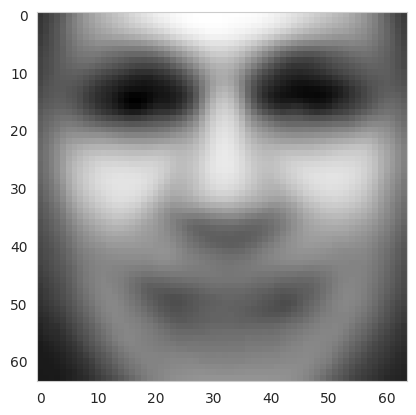

In [ ]:
# Stretch to vector
x = imgs.reshape(imgs.shape[0], 64 * 64)
print(x.shape)
mean = np.mean(x, axis=0)
# Center: substract mean
centered_faces = x - mean
plt.imshow(mean.reshape(64, 64), cmap=plt.cm.gray)
plt.show()

Найдем собственные вектора. Аналогия с фотороботом.

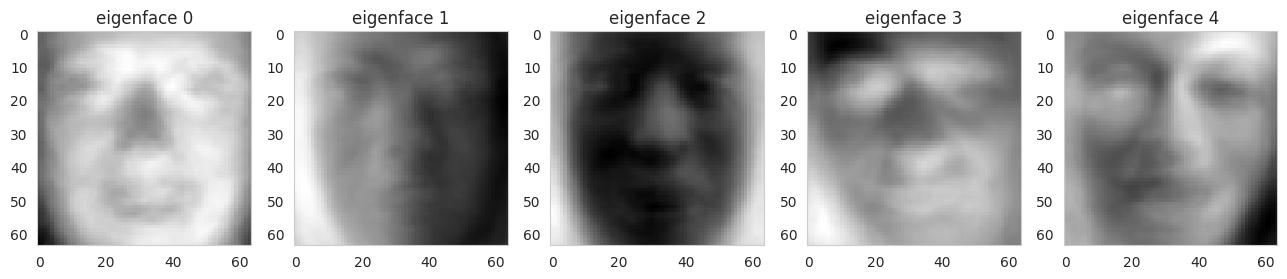

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# n_components == min(n_samples, n_features)

# 1. Load the faces data.
# 2. Apply PCA.
# 3. Extract the principal components.
# 4. Reshape the principal components so that they have the right shape.
# 5. Display the reshaped principal components.

pca_faces = sklearn.decomposition.PCA()  # 1000x4096

pca_faces.fit(centered_faces)
eigenfaces = pca_faces.components_
reshaped_eigenfaces = eigenfaces.reshape((1000, 64, 64))
eigenface_titles = ["eigenface %d" % i for i in range(reshaped_eigenfaces.shape[0])]
show_faces(reshaped_eigenfaces, eigenface_titles)

Восстановим лица с использованием n < 4096 компонент

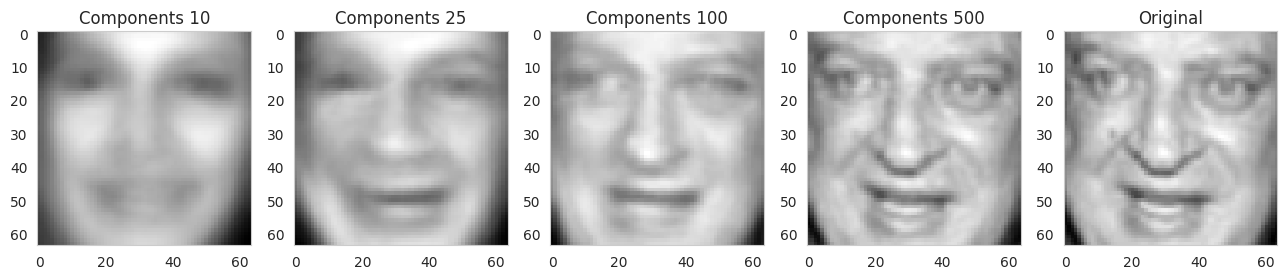

In [ ]:
def create_embedding(img, n_components):
    # Generate embedding for first image using only 10 first components
    img = img.reshape(64 * 64) - mean
    emb = np.dot(img, eigenfaces[:n_components].T)  # (1,4096) * (4096,1)
    # print(emb,emb.shape) # 10 - 500 numbers only!

    # Recover image from embedding
    recovered_img = np.dot(emb, eigenfaces[:n_components])
    recovered_img += mean  # shift by mean
    return emb, recovered_img


# Show images recovered from embeddings of various sizes
original_img = imgs[0]
titles = []
img_list = []
for n in [10, 25, 100, 500]:
    embedding, recovered = create_embedding(original_img, n)
    img_list.append(recovered)
    titles.append(f"Components {n}")
img_list.append(original_img)
titles.append("Original")

show_faces(np.array(img_list, dtype=object), titles)

В данном случае требование на ортогональность компонент, выделяемых PCA, фактически мешает нам

### Проблемы  PCA




##### Интересное направление в данных может не совпадать с направлением максимальной дисперсии.

Рассмотрим случай выборки, которая сгенерирована из двух вытянутых нормальных распределений, чьи основные оси неортогональны друг другу:

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/problem_pca_2.png" width="600"/>

##### Выбранные оси могут вообще не подходить для нашей задачи


В примере ниже дисперсии не отражают интересующих нас направлений в данных:

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/problem_pca_1.png" width="600"/>

Очевидно, что в данном случае метод главных компонент будет считать вертикальную компоненту более значимой для описания набора данных, чем горизонтальную.

Но, например, в случае, когда данные из левого и правого кластера относятся к разным классам, для их линейной разделимости вертикальная компонента является шумовой. Несмотря на это, её метод главных компонент никогда шумовой не признает, и есть вероятность, что отбор признаков с его помощью выкинет из ваших данных значимые для решаемой вами задачи компоненты просто потому, что вдоль них значения имеют низкую дисперсию.

Справляться с такими ситуациями могут некоторые другие методы уменьшения размерности данных, например, метод независимых компонент (Independent Component Analysis, ICA).

#### Недостатки линейного PCA

Как мы увидели в предыдущих примерах, обычный PCA далеко не всегда работает хорошо. В частности, могут быть ситуации, когда построенная PCA проекция не дает хорошего разбиения объектов на группы. Для набора картинок с написанными от руки цифрами  MNIST, PCA даст такой результат:

<center><img src="https://edunet.kea.su/repo/EduNet-content/L04/out/pca_tsne_umap_on_mnist.png" width="1000"/></center>

Также бывают ситуации, когда оптимально спроецировать не на некоторую плоскость, а на многообразие (кривая плоскость), как показано на картинке ниже.

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/s_manifold.png" width="650"/>

В данном случае оптимально спроецировать на S-образную кривую.

В связи с вышеописанными случаями, ниже мы рассмотрим более сильные методы.

## Kernel PCA Ядровой (нелинейный) метод главных компонент

Как уже упоминалось, иногда невозможно захватить всю информацию линейной проекцией, хотя кривая поверхность с такой же размерностью это позволяет сделать. Одним из подходов к решению данной проблемы является задача перевода признаков в нелинейное пространство.

### Kernel trick

Kernel Trick избегает явного перевода наших признаков в пространство новых признаков, ведь пространства бывают очень большие, а нам бы хотелось сэкономить память компьютера.
Оказывается, для PCA не важны собственно признаки объектов, а важны скалярные произведения между объектами.

И это скалярное произведением позволяет подсчитывать напрямую функция $k(\mathbf {x} ,\mathbf {x'})$, которую часто называют *ядром или ядерной функцией (kernel, kernel function)*

Бывают разные ядра, которые считают скалярное произведение в разных пространствах


* $\large \displaystyle k(x_i, x_j) = \frac{1}{z} e^{-\frac{h(x_i, x_j)^2}{h}}$ — радиальная базисная функция (RBF)
* $k(x_i, x_j) = (<x_i, x_j> + c)^d; c, d \in \mathbb{R}$ — полиномиальное ядро
* $k(x_i, x_j) = \sigma((<x_i, x_j>)$ — ядро с функцией активации


### Пример

In [ ]:
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html
from sklearn.datasets import make_circles

np.random.seed(42)

# 1. Make_circles creates a data set of 400 points that form concentric circles with a gap of 50 points.
# 2. The factor parameter controls the size of the inner circles.
# 3. The noise parameter controls the amount of noise added to the data.
# 4. The result is a 360-feature dataset of concentric circles with gaps.

x, y = make_circles(n_samples=400, factor=0.3, noise=0.05, random_state=42)

Возьмем две концентрические окружности

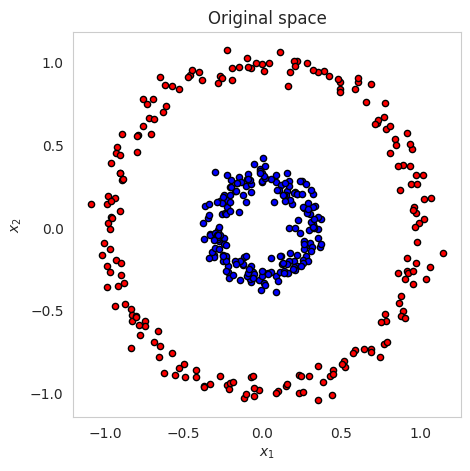

In [ ]:
plt.figure(figsize=(5, 5))

plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(x[reds, 0], x[reds, 1], c="red", s=20, edgecolor="k")
plt.scatter(x[blues, 0], x[blues, 1], c="blue", s=20, edgecolor="k")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

Обычный PCA не может их разделить

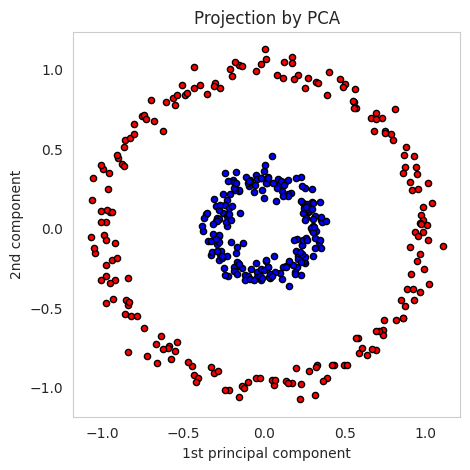

In [ ]:
pca = PCA()
x_pca = pca.fit_transform(x)
plt.figure(figsize=(5, 5))
plt.scatter(x_pca[reds, 0], x_pca[reds, 1], c="red", s=20, edgecolor="k")
plt.scatter(x_pca[blues, 0], x_pca[blues, 1], c="blue", s=20, edgecolor="k")
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")
plt.show()

А вот KernelPCA  справляется

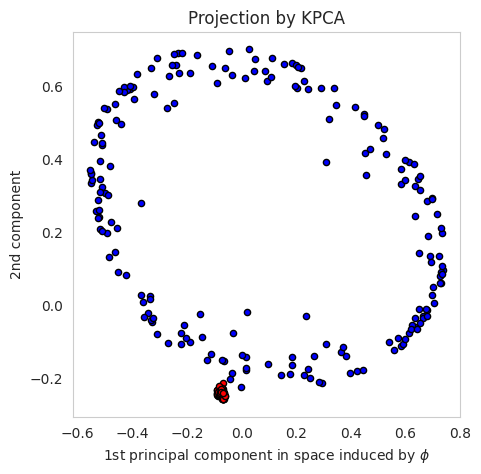

In [ ]:
from sklearn.decomposition import KernelPCA

# 1. Create a PCA object to perform the PCA transformation
#    using the RBF kernel (specified using kernel="rbf").
#    Setting fit_inverse_transform=True. This will make the object use the
#    transformed data from the first step when transforming new, unseen data points.
# 2. Let the PCA object fit and transform the data,
#    then get the transformed data back.

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
x_kpca = kpca.fit_transform(x)

plt.figure(figsize=(5, 5))
plt.scatter(x_kpca[reds, 0], x_kpca[reds, 1], c="red", s=20, edgecolor="k")
plt.scatter(x_kpca[blues, 0], x_kpca[blues, 1], c="blue", s=20, edgecolor="k")
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.show()

Хотя, конечно, и восстанавливать он будет не идеально: работал-то он по факту в пространстве бОльшей размерности и оси строил там.

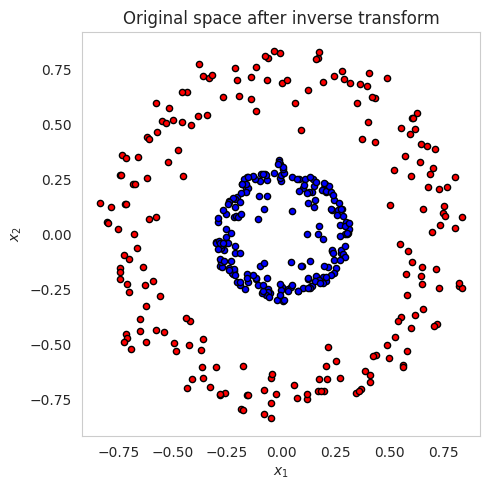

In [ ]:
# 1. The 'kpca' variable is a KernelPCA object that is initialized with 'n_components' set to 2.
# 2. Then it applies the kernel function specified in the 'kernel' variable  and then transforms the data based on the kernel, and gets the transformed data.
# 3. Then it returns the transformed data.
# 4. Then we get the inverse transformation by simply calling "kpca.inverse_transform(x_kpca)"
# 5. Finally, we plot the transformed data.

x_back = kpca.inverse_transform(x_kpca)
plt.figure(figsize=(5, 5))
plt.scatter(x_back[reds, 0], x_back[reds, 1], c="red", s=20, edgecolor="k")
plt.scatter(x_back[blues, 0], x_back[blues, 1], c="blue", s=20, edgecolor="k")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()

Kernel PCA довольно чувствителен к выбору ядра.

К примеру, для данных, расположенных на трех окружностях:

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/kernel_pca_three_circles.png" width="260"/>

в зависимости от выбора ядра мы будем получать совершенно разные отображение в спрямляющее пространство:

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/kernel_pca_different_kernels.png" width="600"/>

## Методы, основанные на сохранении расстояний

Существуют и другие методы понижения размерности в данных. К примеру, t-SNE и UMAP.

Они решают немного иначе поставленную задачу: из измерения новой размерности мы не должны легко переходить в старое измерение. Взамен этого требуется, чтобы сохранялись расстояния между объектами. Причем, особое внимание уделяется близким расстояниям. Далекие же могут не сохраняться.

## t-SNE (t-distributed stochastic neighbor embedding)

Идея состоит в том, чтобы не напрямую максимизировать дисперсию, а найти такое пространство, в котором расстояние между объектами будет сохраняться или по крайне мере не сильно меняться.

При этом будем больше беспокоиться о расстоянии между близкими объектами, нежели о расстоянии между далекими.

### Описываем расстояния в исходном пространстве

Для простоты будем в качестве исходного пространства рассматривать 2-мерное

1. Считаем все расстояния от заданной точки до остальных:

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/tsne_compute_distance_in_source_space_step1.png" width="200">

2. Откладываем расстояния на прямой, предполагая, что это координаты $x$ точек, лежащих на графике плотности нормального распределения. И в качестве ненормированных расстояний используем координаты $y$ этих точек:

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/tsne_compute_distance_in_source_space_step2.png" width="300">

Далее эти ненормированные расстояния нормируем на их сумму, чтобы для каждой точки похожести несли примерно одинаковый смысл. В итоге получается такая формула:
$$\large p_{j\mid i}={\frac {\exp(-\lVert \mathbf{x}_{i}-\mathbf {x}_{j}\rVert^{2}/2\sigma_{i}^{2})}{\sum_{k\neq i}\exp(-\lVert \mathbf{x}_{i}-\mathbf{x}_{k}\rVert^{2}/2\sigma_{i}^{2})}}$$


Стандартное отклонение будет различным для каждой точки. Оно подбирается бинарным поиском так, чтобы точки в областях с большей плотностью имели меньшую дисперсию. Для этого используется параметр perplexity: чем он больше, тем более далеким соседям уделяется внимание (стандартные отклонения становятся в целом больше).


Чтобы получить симметричные расстояния $p_{ij}$, их считают по следующей
формуле:

$$p_{ij} = \frac{p_{j\mid i} + p_{i\mid j}}{2N}$$

В итоге получаем матрицу расстояний следующего вида:

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/tsne_get_distance_matrix.png" width="650"/>

### Описываем расстояния в пространстве низкой размерности

Обычно в случае t-SNE используют пространства двумерные и трехмерные. Это вызвано во многом скоростью работы метода и тем, что он преимущественно используется для визуализации.

Для простоты будем в качестве пространства низкой размерности рассматривать одномерное.

Расположим точки, соответствующие точкам из исходного пространства, случайным образом в одномерном пространстве.

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/tsne_points_in_one_dimensional_space.png" width="350"/>

Точно так же будем считать расстояние между выбранной точкой и остальными и использовать эти расстояния не в качестве $x$, а в качестве $y$, и, как следствие, similarity, будем использовать не нормальное распределение, а распределение Стьюдента.

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/tsne_compute_similarity.png" width="350"/>

Почему?
Оно более "тяжелое" в хвостах и поэтому дает возможность больше внимания уделять далеким точкам. Это позволяет компенсировать дисбаланс в распределении расстояний в пространстве большей и меньшей размерностей. Без этого точки у нас будут "липнуть" друг к другу.

В итоге мы получили две матрицы расстояний: в исходном и в новом пространстве:

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/tsne_two_matrix_distance.png" width="600"/>

### Оптимизируем низкоразмерное представление

Они абсолютно друг на друга не похожи, что логично: пока что наша проекция в новое пространство абсолютно случайная. Надо как-то править представление в новом пространстве. Именно для этого авторы и использовали плотности и прочее — чтобы задать теперь хорошую cost-функцию, которую затем нужно минимизировать.

Cost-функцией будет
$$Cost = KL(P||Q) = \sum_{i \neq j}{p_{ij} log \frac{p_{ij}}{q_{ij}}}$$

Минимизируем это градиентным спуском.

Фактически, такое требование минимизировать cost-функцию говорит следующее: я хочу получить такое представление, чтобы объекты, которые находились в исходном пространстве близко, **вероятно**, находились и в представлении близко, а объекты, которые находились далеко — далеко.

### Пример применения

Для того, чтобы t-SNE сходился лучше и определеннее, в качестве изначальных координат точек в новом пространстве можно использовать не случайный шум, а первые две компоненты PCA.

Преследуем две цели: уменьшить время работы t-SNE (который работает очень медленно) и убрать эффект шума на t-SNE — он может на него реагировать, особенно при условии, что схождения к минимуму мы можем не дождаться.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8617 samples in 0.012s...
[t-SNE] Computed neighbors for 8617 samples in 0.543s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8617
[t-SNE] Computed conditional probabilities for sample 2000 / 8617
[t-SNE] Computed conditional probabilities for sample 3000 / 8617
[t-SNE] Computed conditional probabilities for sample 4000 / 8617
[t-SNE] Computed conditional probabilities for sample 5000 / 8617
[t-SNE] Computed conditional probabilities for sample 6000 / 8617
[t-SNE] Computed conditional probabilities for sample 7000 / 8617
[t-SNE] Computed conditional probabilities for sample 8000 / 8617
[t-SNE] Computed conditional probabilities for sample 8617 / 8617
[t-SNE] Mean sigma: 0.336887
[t-SNE] Computed conditional probabilities in 0.326s
[t-SNE] Iteration 50: error = 72.8291931, gradient norm = 0.0087157 (50 iterations in 6.128s)
[t-SNE] Iteration 100: error = 72.3467102, gradient norm = 0.0023780 (50 iterations in 4

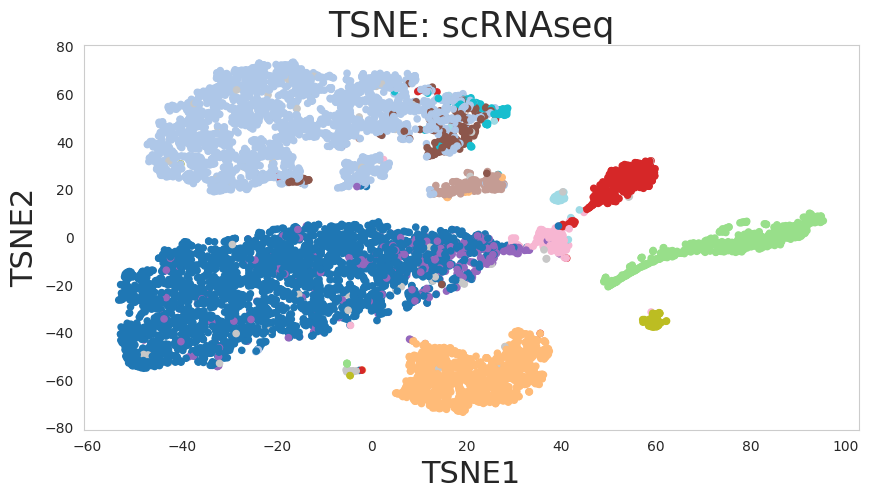

In [ ]:
import sklearn.manifold

# 1. Firstly we reduce the dimensionality of the data to 6 features using PCA.
# 2. Then we take the first two PCA components and use this
#    as an initial approximation for the T-SNE algorithm.
# 3. Then we fit T-SNE on the data and plot the first two dimensions
#    of the T-SNE output, which are represented in green.
# 4. The visualization makes clear that there are distinct clusters in our data

x_reduced = PCA(n_components=6).fit_transform(x_scRNAseq)
model = sklearn.manifold.TSNE(
    n_components=2,
    init=x_reduced[:, 0:2],  # often use as a reasonable approximation
    perplexity=40,  # important parameter
    verbose=2,
    learning_rate="auto",
)

manifold = model.fit_transform(x_reduced)

plt.figure(figsize=(10, 5))
plt.scatter(manifold[:, 0], manifold[:, 1], c=y_scRNAseq, cmap="tab20", s=20)
plt.title("TSNE: scRNAseq", fontsize=25)
plt.xlabel("TSNE1", fontsize=22)
plt.ylabel("TSNE2", fontsize=22)
plt.show()



И покрасим по разметке, которая нам известна из эксперимента. Видим, что разделение очень хорошее

### Важные параметры t-SNE



#### perplexity

Определяет то, как подбирается стандартное отклонение для распределения расстояний для каждой точки. Чем больше **perplexity**, тем более глобально мы смотрим на структуру.


#### metric
Как считаются расстояния между точками — **metric**. По умолчанию используется евклидово расстояние, но часто помогают и другие (например, косинусное).

#### learning_rate

Шаг градиентного спуска, тоже влияет на полученное представление.

### Проблемы t-SNE




Чтобы продемонстрировать проблемы t-SNE, берем оригинальные данные в 2D пространстве и добавляем к ним новые признаки, взятые из нормального шума.
Далее пытаемся восстановить изначальную структуру.

#### Стохастичность

Низкоразмерное представление, которое вы получите, будет отличаться между запусками, если не зафиксировать **random seed**. Может отличаться довольно сильно.

#### Добавление новых точек

Если у вас появились новые данные, то добавить их на  представление, полученное при помощи t-SNE ранее — нетривиальная задача.
Для разных областей есть свои "подгоны", но все это эвристика.

#### Расстояния между кластерами точек могут ничего не значить (плохо сохраняются далекие расстояния)

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/tsne_problems_distances_between_clusters_no_matter.png" width="1000"/>

#### Размеры кластеров ничего не значат

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/tsne_problems_cluster_size_no_matter.png" width="1000"/>

#### Можно увидеть артефактные кластеры

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/tsne_problems_artifact_clusters.png" width="1000"/>

#### Можно увидеть не ту структуру, которая по идее должна быть

<img src="https://edunet.kea.su/repo/EduNet-content/L04/out/tsne_problems_erroneous_structure.png" width="1000"/>

[Подробнее](https://distill.pub/2016/misread-tsne/)

#### Использование для кластеризации



Из-за указанных  недостатков результат t-SNE НЕЛЬЗЯ использовать для кластеризации.



[Хорошее видео про t-SNE](https://www.youtube.com/watch?v=NEaUSP4YerM)

[Статья по применению t-SNE в биологии](https://www.nature.com/articles/s41467-019-13056-x)

## UMAP



[UMAP](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html) — uniform manifold approximation and projection. [Видео](https://www.youtube.com/watch?v=94ZMJ8tq1Wk)

[Красивая демонстрация](https://pair-code.github.io/understanding-umap/)


Использует похожую на t-SNE идею, но иначе, в результате чего получает много выгодных бонусов.

Внутри себя метод строит граф, в котором ребрами соединены между собой k ближайших соседей. При этом эти ребра неравноправны: если для данной пары точек расстояние между ними сильно больше, чем расстояния между ними и другими точками, то и ребро будет иметь маленький вес.

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/umap.png" width="800">

Далее задача состоит в том, чтобы в пространстве более низкой размерности получился граф, похожий на тот, который был в пространстве высокой размерности.
Для этого оптимизируем низкоразмерное представление градиентным спуском.

### Пример применения

In [ ]:
from IPython.display import clear_output

!pip install -q umap-learn
!pip install -q --upgrade tbb
clear_output()

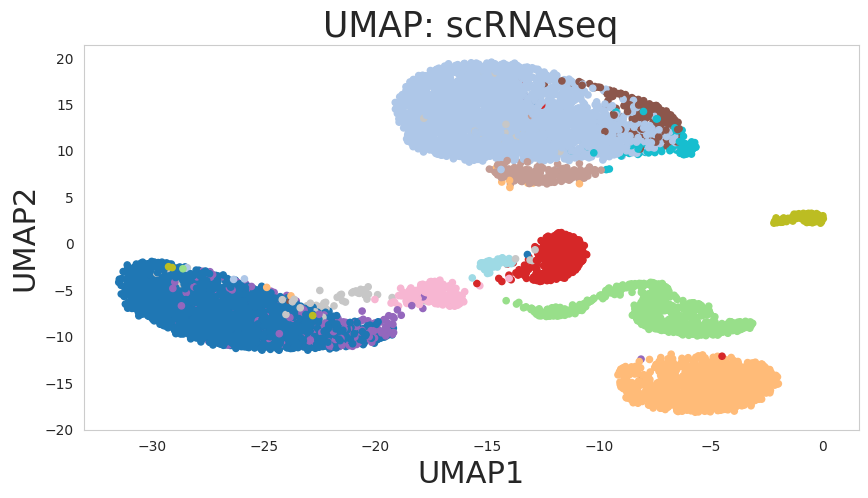

In [ ]:
from umap import UMAP

# Converts the original expression matrix (scRNAseq) into a 9-dimensional PCA space
x_reduced = PCA(n_components=9).fit_transform(x_scRNAseq)

# Initializes UMAP with the PCA components
model = UMAP(
    n_components=2,
    min_dist=1,
    n_neighbors=93,
    init=x_reduced[:, 0:2],
    # it is recommended to use the first two components of PCA for initialization of UMAP and t-SNE
    n_epochs=1000,
    verbose=2,
)

# Runs the UMAP algorithm on the PCA transformed data
umap = model.fit_transform(x_reduced)
clear_output()
# Plots the results of the UMAP transformation
plt.figure(figsize=(10, 5))
plt.scatter(umap[:, 0], umap[:, 1], c=y_scRNAseq, cmap="tab20", s=20)
plt.title("UMAP: scRNAseq", fontsize=25)
plt.xlabel("UMAP1", fontsize=22)
plt.ylabel("UMAP2", fontsize=22)
plt.show()

### Важные параметры



#### n_neighbors

Число соседей, которые ищутся для каждой точки. Влияет на то, насколько глобально мы смотрим на структуру данных.


#### min_dist

Влияет на то, насколько близко могут находиться между собой точки в новом представлении.

#### metric

Определяет, как считаются расстояния между точками. По умолчанию Евклидово расстояние, но это не всегда дает лучший результат.

### Преимущества перед t-SNE



#### Скорость работы

Выдает результаты, похожие на t-SNE, но  работает в разы быстрее

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L04/umap_tsne_performance.png" width="500"/></center>

<center><em>Source: <a href="https://umap-learn.readthedocs.io/en/latest/performance.html">Performance Comparison of Dimension Reduction Implementations</a></em><center>



#### Возможность проецировать новые точки
UMAP может проецировать точки из новых датасетов на уже имеющееся представление.



#### Может объединять представления

Если у вас есть признаки, сильно отличающиеся по своим свойствам, то можно построить для них представления отдельно с разными метриками, а далее объединить их.




#### Более интуитивные параметры

Параметры **n_neighbours** и **min_dist** намного понятнее их аналога — perplexity.

#### Можно использовать для отображения и в пространства бОльшей размерности

Кроме того, его можно использовать для понижения размерности не только до 2-3 (в целях визуализации), но и для больших размерностей, с которыми потом работать другими методами (хотя здесь надо быть аккуратным, он тоже склонен деформировать дальние расстояния)

#### Расстояния более информативны

Плохая идея — интерпретировать расстояния между кластерами и их размеры для 2D представлений.

Но в случае UMAP это менее выражено.





<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/umap_distance_has_more_iformative_value.png" width="800">

Если же отображать в пространство размерности большей, чем два, то можно получить и очень хорошие представления. Но это все эвристика, может и не повезти.

#### Supervised UMAP

UMAP позволяет передать в него метки объектов — вы можете получать представление, которое оптимизировано под имеющуюся у вас информацию о кластерах.

#### Semi-Supervised UMAP

UMAP позволяет передать в него метки **только для части** объектов — вы можете получать представление, которое оптимизировано под имеющуюся у вас информацию о кластерах, но при этом не оставляет без внимания объекты без меток.

## Кластеризация

Когда говорят про задачу кластеризации подразумевают примерно следующее:

У нас есть данные, и мы хотим поделить эти данные по каким-то группам, где в каждой группе будут объекты, похожие друг на друга. Под похожестью как правило понимается выбранная метрика расстояния.

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/clustering_task.png" width="700">

Основные цели кластеризации:

* Исследование данных. Мы хотим понять, какие кластеры являются ярко выраженными, и сделать дополнительные выводы о наших данных.

* Нахождение аномалий/выбросов. Мы можем искать объекты, которые сильно отличаются от всех остальных и не принадлежат никакому кластеру.

* Создание дополнительных признаков. Кластер для объекта уже является дополнительным категориальным признаком.

* Непосредственно классификация. Например, можем считать получившиеся кластеры классами и классифицировать объекты таким образом.

Алгоритмов кластеризации существует большое количество, и все работают по-разному, имеют разные параметры для настройки. Мы рассмотрим два наиболее популярных: K-Means и DBSCAN.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L04/sphx_glr_plot_cluster_comparison.png" width="800"></center>

<center><em>Source: <a href="https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods"> Overview of clustering methods</a></em></center>

### Алгоритм K-Means

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/kmeans.png" width="700">

1. Выбираем количество кластеров $k$, которое нам кажется оптимальным для наших данных.
2. Определяем начальное положение центроидов кластеров, случайным образом или по какому-либо правилу.
3. Для каждой точки нашего набора данных считаем расстояние до центроидов. Относим точки к ближайшим центроидам.
4. Перемещаем каждый центроид в центр получившихся кластеров.
5. Повторяем шаги 3–4 до тех пор, пока не сойдемся (пока центроиды не перестанут значительно сдвигаться).


[Интерактивная визуализация алгоритма K-Means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

Особенности K-Means:

* Сильно зависит от параметра $k$ и начального положения центроидов.
* Кластеры получаются гиперсферическими, с более сложными формами алгоритм не справляется.
* Все точки относятся к какому то кластеру, явных выбросов нет.



### Алгоритм DBSCAN

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/dbscan.png" width="700">

DBSCAN (Density-based spatial clustering of applications with noise, плотностной алгоритм пространственной кластеризации с присутствием шума), как следует из названия, оперирует плотностью данных. На вход требуется матрица близости и два загадочных параметра — радиус $\varepsilon$-окрестности и количество соседей.


Алгоритм выглядит следующим образом:
1. Берем случайную точку из данных
2. Если рядом с ней меньше трёх точек, переносим ее в список возможных одиночек и выбираем другую точку.

Иначе:
3. Исключаем ее из списка точек, которые надо посмотреть.
4. Ставим ей зеленую метку и создаем новый кластер, к которому относится пока только одна точка.
5. Просматриваем всех ее соседей. Если ее сосед уже в списке потенциальных одиночек и рядом с ним мало других точек, то перед нами край кластера. Для простоты можно сразу пометить его жёлтым флагом, присоединить к группе и продолжить обход. Если сосед тоже оказывается «зелёным», то он не стартует новую группу, а присоединяется к уже созданной. Кроме этого мы добавляем в список обхода соседей соседа. Повторяем этот пункт, пока список обхода не окажется пуст.
6. Повторяем шаги 1–5, пока так или иначе не посмотрим все точки.
7. Разбираемся со списком одиночек. Если мы уже раскидали всех краевых, то в нём остались только выбросы-одиночки — можно сразу закончить. Если нет, то нужно как-нибудь распределить точки, оставшиеся в списке.

[Подробнее про DBSCAN](https://habr.com/ru/post/322034/)

[Интерактивная визуализация алгоритма DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

### Понижение размерности для улучшения качества кластеризации

Методы понижения размерности, такие как UMAP и t-SNE, могут быть использованы как эффективный метод предобработки данных для последующей передачи в [алгоритмы кластеризации на основе плотности](https://en.wikipedia.org/wiki/DBSCAN). Данные методы понижения размерности не полностью сохраняют информацию о плотности распределения объектов при осуществлении проекции в низкоразмерное пространство, поэтому следует относиться к такой предобработке с некоторой осторожностью (рекомендуем ознакомиться с [вот этим обсуждением](https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne) на  stackexchange). Несмотря на эти опасения, все же есть веские причины для использования данных методов понижения размерности в качестве этапа предварительной обработки для кластеризации. Как и при любом подходе к кластеризации, необходимо провести исследование и оценку полученных кластеров, чтобы попытаться валидировать разбиение на них, если это возможно.

Загрузим датасет с одноканальными $8 \times 8$ изображениями рукописных цифр:

In [ ]:
from sklearn import datasets

digits = datasets.load_digits(n_class=10)
x = digits.data
y = digits.target
n_samples, n_features = x.shape
print(x.shape)

(1797, 64)


Понизим размерность данных $64 \rightarrow 2$ при помощи t-SNE:

In [ ]:
from sklearn import manifold


# t-SNE embedding of the digits dataset
tsne = manifold.TSNE(n_components=2, init="pca", random_state=42, learning_rate="auto")
x_tsne = tsne.fit_transform(x)

Понизим размерность данных $64 \rightarrow 2$ при помощи UMAP:

In [ ]:
umap = UMAP(n_neighbors=5)
x_umap = umap.fit_transform(x)

Визуализируем результаты:

In [ ]:
from matplotlib import offsetbox


def plot_embedding(x, title=None):
    x_min, x_max = np.min(x, 0), np.max(x, 0)
    x = (x - x_min) / (x_max - x_min)  # normalization of x to (0..1) range

    plt.figure()
    ax = plt.subplot(111)
    for i in range(x.shape[0]):
        plt.text(
            x[i, 0],
            x[i, 1],
            str(y[i]),
            color=plt.cm.Set1(y[i] / 10.0),
            fontdict={"weight": "bold", "size": 9},
        )

    if hasattr(offsetbox, "AnnotationBbox"):
        # only print thumbnails with matplotlib > 1.0
        shown_imgs = np.array([[1.0, 1.0]])  # just something big
        for i in range(x.shape[0]):
            dist = np.sum((x[i] - shown_imgs) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_imgs = np.r_[shown_imgs, [x[i]]]
            img_box = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), x[i]
            )
            ax.add_artist(img_box)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(x.shape[0]):
        plt.text(
            x[i, 0],
            x[i, 1],
            str(y[i]),
            color=plt.cm.Set1(y[i] / 10.0),
            fontdict={"weight": "bold", "size": 9},
        )
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

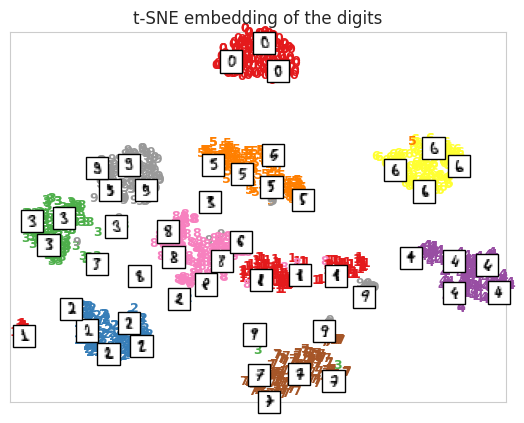

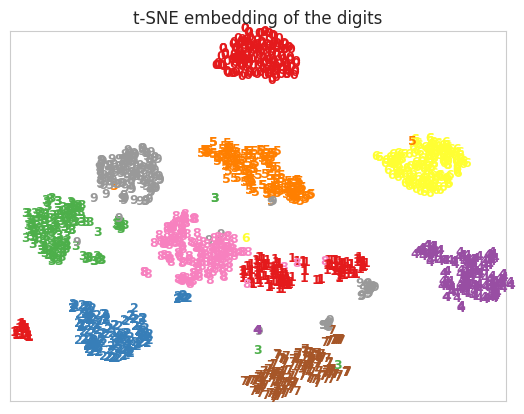

In [ ]:
# t-SNE embedding of the digits dataset
plot_embedding(x_tsne, "t-SNE embedding of the digits")

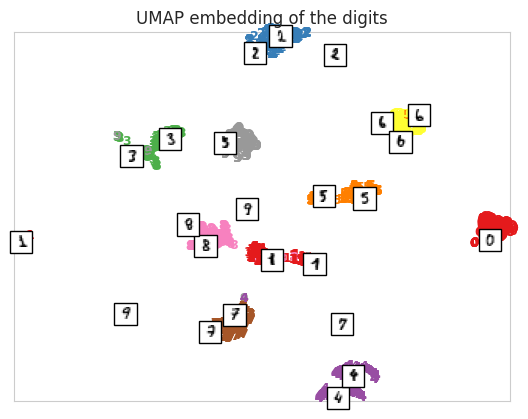

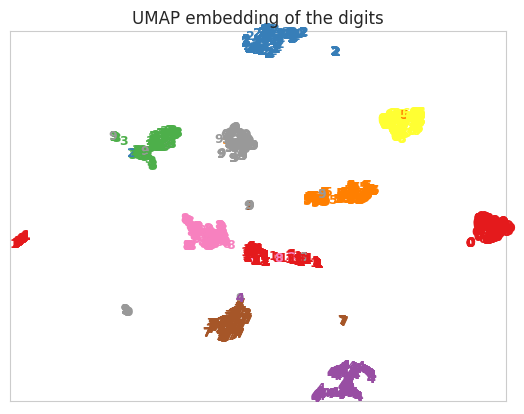

In [ ]:
# UMAP embedding of the digits
plot_embedding(x_umap, "UMAP embedding of the digits")

Как нетрудно заметить, при использовании UMAP точки из датасета при проекции в низкоразмерное пространство оказались расположены более "кучно", нежели чем при использовании t-SNE.

Теперь попробуем кластеризовать наши данные при помощи K-Means. Для оценки качества воспользуемся стандартными метриками [`adjusted_rand_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) и [`adjusted_mutual_info_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html) из `sklearn.metrics`.

In [ ]:
import sklearn.cluster as cluster

kmeans_labels_on_raw = cluster.KMeans(n_clusters=10, n_init="auto").fit_predict(x)

In [ ]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


def plot_clustering_metrics(true_l, pled_l, title):
    ari = adjusted_rand_score(true_l, pled_l)
    ami = adjusted_mutual_info_score(true_l, pled_l)
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    plt.title(f"Clustering metrics for {title}\n\n 1.0 is best")
    width = 0.75
    ind = np.arange(2)
    ax.barh(ind, [ari, ami], width)
    ax.grid(axis="x")
    ax.set_xlim([0, 1.0])
    for i, v in enumerate([ari, ami]):
        ax.text(v + 0.01, i, f"{v:1.2f}", color="black")
    ax.set_yticks(ind)
    ax.set_yticklabels(["ARI", "AMI"], minor=False)
    plt.show()

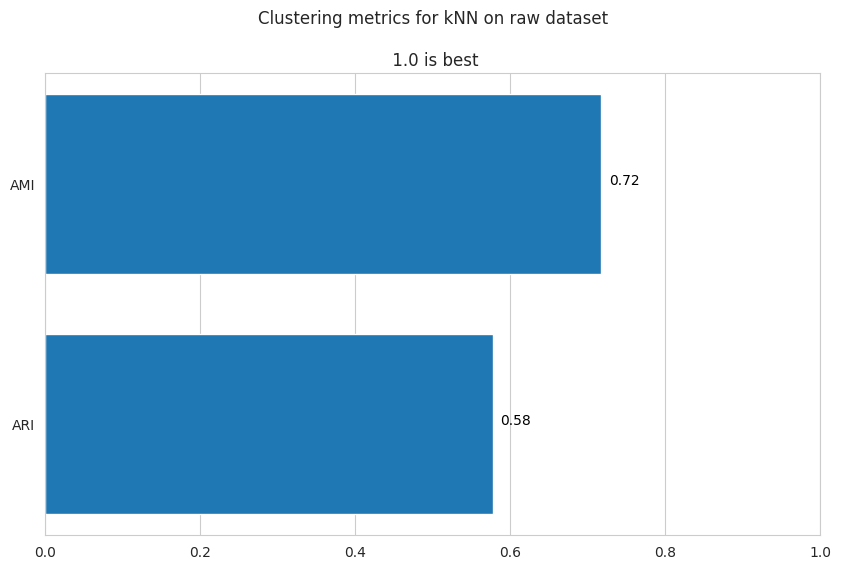

In [ ]:
plot_clustering_metrics(y, kmeans_labels_on_raw, "kNN on raw dataset")

Теперь передадим K-Means данные после понижения размерности:

In [ ]:
kmeans_labels_on_x_tsne = cluster.KMeans(n_clusters=10, n_init="auto").fit_predict(
    x_tsne
)
kmeans_labels_on_x_umap = cluster.KMeans(n_clusters=10, n_init="auto").fit_predict(
    x_umap
)

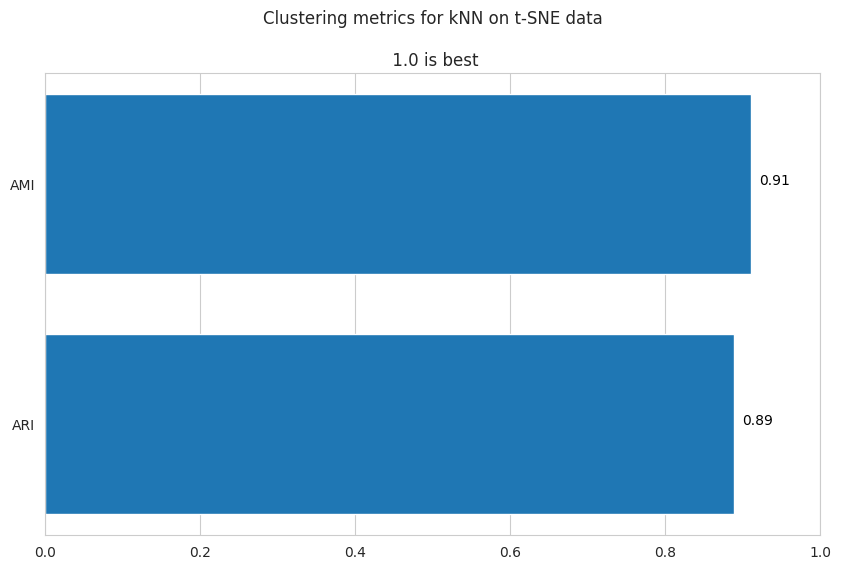

In [ ]:
plot_clustering_metrics(y, kmeans_labels_on_x_tsne, "kNN on t-SNE data")

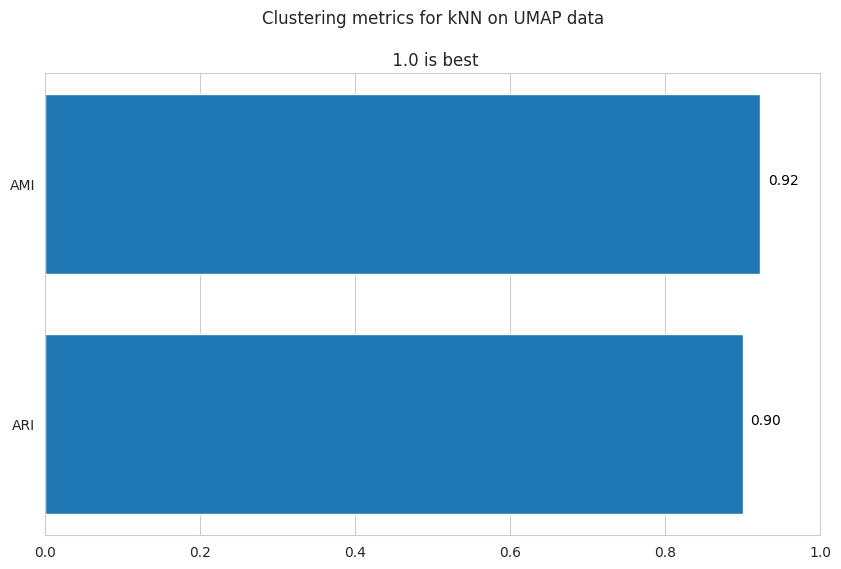

In [ ]:
plot_clustering_metrics(y, kmeans_labels_on_x_umap, "kNN on UMAP data")

Применяя методы понижения размерности на этапе предобработки данных, мы смогли значительно улучшить качество кластеризации. Использование UMAP в разобранном нами примере позволило достичь лучших результатов по сравнению с t-SNE и получить прирост практически в 20% относительно метрик качества кластеризации.